Title: SARS Outbreak

Author: Marko Miholjcic

Abstract:


Introduction:

The SARS coronavirus (SARS-CoV) outbreak was an outbreak that lasted approximately six months in 2003 [1]. The virus is thought to be an animal virus that had spread to multiple animals and first infected humans in southern China [2]. In March of 2003, the CDC issued a global alert for an atypical pneumonia that was given the name, “Severe Acute Respiratory Syndrome (SARS).” Throughout 2003, the CDC issued multiple travel alerts for various countries around the world. By the end of the year, 29 countries and regions reported that they had cases of SARS. In January of 2004, a SARS-like virus was isolated from civets. This finding suggested that the virus may have been passed to humans from the civets [1]. 
	The characteristics of the disease were detrimental to human health. The virus was transmitted from person to person and transmission occurred mostly in health care settings. People who were infected with the SARS virus experienced one or more of the following symptoms: fever, cough, shortness of breath, malaise, myalgia, headache, diarrhea, and shivering. Fever was the most frequently reported symptom [2]. 
	The SARS-CoV virus has drawn comparisons to the COVID-19 virus that is currently disrupting the entire world in 2020. The viruses target the same receptor, ACE-2. Patients who were infected by the SARS-CoV virus or COVID-19 displayed ground glass opacities in their chest x-ray results. Additionally, droplets from infected individuals are the manner in which the virus transmits from person to person. One difference that has been identified is that the SARS-CoV virus has a larger case fatality rate overall. 
	This topic is important because it can provide insight to how countries were impacted by a respiratory disease similar to COVID-19 in recent history. These insights can help us determine which virus was deadlier in each country that was affected. The connection between the SARS-CoV virus and the COVID-19 virus assists in making the topic interesting. 
	There are multiple questions answered in this project, but the main question is: How were countries affected by the SARS outbreak relative to the COVID-19 outbreak? Other questions that are covered in this project include: what variables are good predictors of the severity of the outbreak?, what is the best logistic regression model for the cumulative amount of cases in China?, and which model produces the best classifier for the percent of population infected classifier?
	There is a single hypothesis for every component of the project. The hypothesis for the main question is that countries that were impacted more by SARS outbreak were impacted less by COVID-19 outbreak, relative to other countries. The hypothesis is that the variables of life expectancy at birth for both sexes, probability of dying age 15-59 for both sexes, and the probability of dying under age 5 for both sexes will be the best predictors of the severity of the SARS outbreak. The best logistic regression is hypothesized to be the generalized linear model. The final hypothesis is that the lasso regression will have the best accuracy. This is because it sets less important predictors to 0. All of these hypothesis will be evaluated. 


Methods:

The datasets come from multiple resources. Kaggle provided the datasets for the 2003 SARS outbreak and the COVID-19 outbreak. The SARS outbreak data ranges from March 17, 2003 to July 11, 2003. The COVID-19 data ranges from January 22, 2020 to March 29, 2020. The WHO report for 2003 was retrieved from an excel file found on the WHO’s website. The population data for each country was retrieved from the World Bank.  
	The data was cleaned in the python notebook. The five countries with the highest number of cumulative cases during the outbreak were chosen for the analysis. This decision was made because there were not a lot of countries that had a lot of cases. The drop off in the number of cumulative cases was large from the most infected country to the second-most infected country and from the fourth-most infected country to the fifth most infected country. Italy and Germany were chosen because they were among the most infected countries during the COVID-19 outbreak, but among the least infected countries during the SARS outbreak. 
	A variety of methods were used to analyze the data. The code for the creation of the time series was included in the python notebook. There were four different time series plots: time series of the cumulative cases for the SARS outbreak, time series of the total deaths for the SARS outbreak, time series of the cumulative cases for the COVID-19 outbreak, and the time series of the total deaths cases for the COVID-19 outbreak. The data was split into two data frames. One data frame was for the total number of deaths on the final day of the outbreak. The other data frame was for the total number of cumulative cases on the final day of the outbreak. These data frames were further divided into separate data frames for each outbreak. Boxplots, skew calculations, kurtosis calculations, and histograms were used to analyze the distributions of the countries for the different outbreaks. Following this analysis, the percentage of infected in a country and the percentage of infections that resulted in deaths were analyzed. The percentage of infected in a country were determined by obtaining the total number of infected on the final day of the outbreak and dividing that value by the total population. The percentage of infected that resulted in death were determined by obtaining the total number of deaths on the final day of the outbreak and dividing that number by the total number of infected. Afterwards, bar plots and stacked histograms were used to compare the outbreaks to one another and to compare the countries to one another during a specific outbreak. The number of active cases was determined by subtracting the cumulative total for a specific country by the number of total deaths and number of recovered in that same country. Multiple T-Tests were performed to determine if there were differences between the average number of active cases during the SARS outbreak in each country. The results of the t-test determined an “active case level.” Level 1 was the level that indicated the largest number of active cases per day during the SARS outbreak. Level 4 was the level that indicated the largest number of active cases per day during the SARS outbreak. Risk ratios and odds rations were calculated for the selected countries. The purpose of the ratios was to determine which outbreak was more risker for the selected countries. Finally, two logistical regressions were created for China during the SARS 2003 outbreak using the generalized linear model, and the non-linear least squares regression. 
	The minor questions were answered by creating a variety of  regressions. A classification variable was added to the World Health Organization data. This variable classified countries who have more than 0.000000175 (0.0000175%) of their population infected as a high infection and were denoted with a, “1,” classification. Countries who were below this threshold were considered low infection and were denoted with a, “0,” classification. This threshold was chosen arbitrarily because the percentages in each country during the SARS outbreak were so low. None of the countries were near a national emergency. For our purposes, we wanted to develop the most accurate model. The generalized linear model was tested with a variety of variables in order to determine the combination of variables that produced the best accuracy. This is the way the model determined the best predictor variables. The mean squared error of Lasso, Ridge, and Elastic Net regularizations were determined in order to choose the best regularization. The accuracy of the generalized linear model is compared to the best regularization. Leave one out cross validation, and 10-fold cross validation were performed on the regressions. 


Results:

In [2]:
library(tidyverse)
library("ggplot2")
library("dplyr")
library("reshape2")
library("knitr")
library(e1071)
library(mosaic)

dfSC = read.csv("CumulativeCases.csv", header = T)
dfSD = read.csv("TotalDeaths.csv", header = T)
dfSR = read.csv("TotalRecovered2003.csv")

dfW_7 = read.csv("WHOselect7.csv", header = T)

cumulSC = read.csv("Cumulative.csv")
totDLD = read.csv("TotalDeathsLD.csv")

cumulSC28 = read.csv("Cumulative28.csv")

In [3]:
library(IRdisplay)

Time Series for the Cumulative Number of Cases during the SARS Outbreak

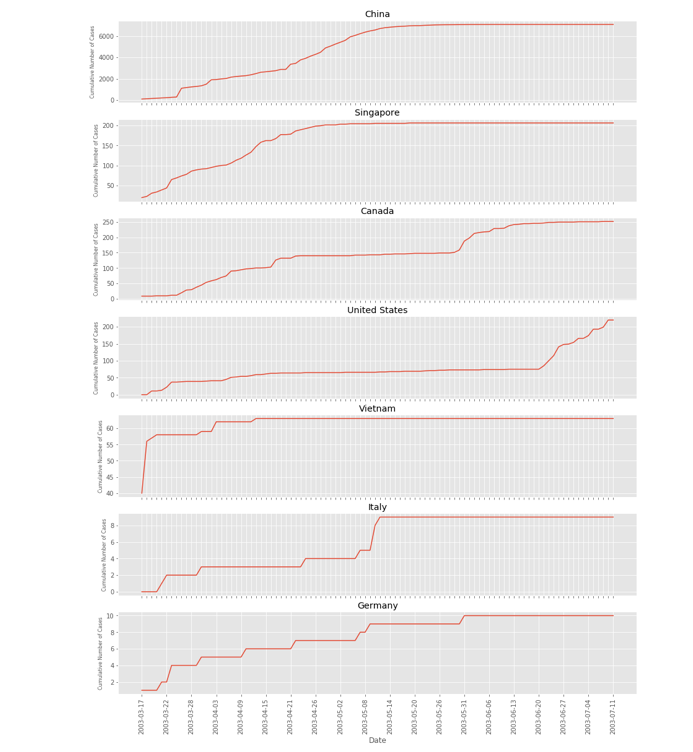

In [4]:
display_png(file = 'TSCC2003.png')

Time Series for the Cumulative Number of Deaths during the SARS Outbreak

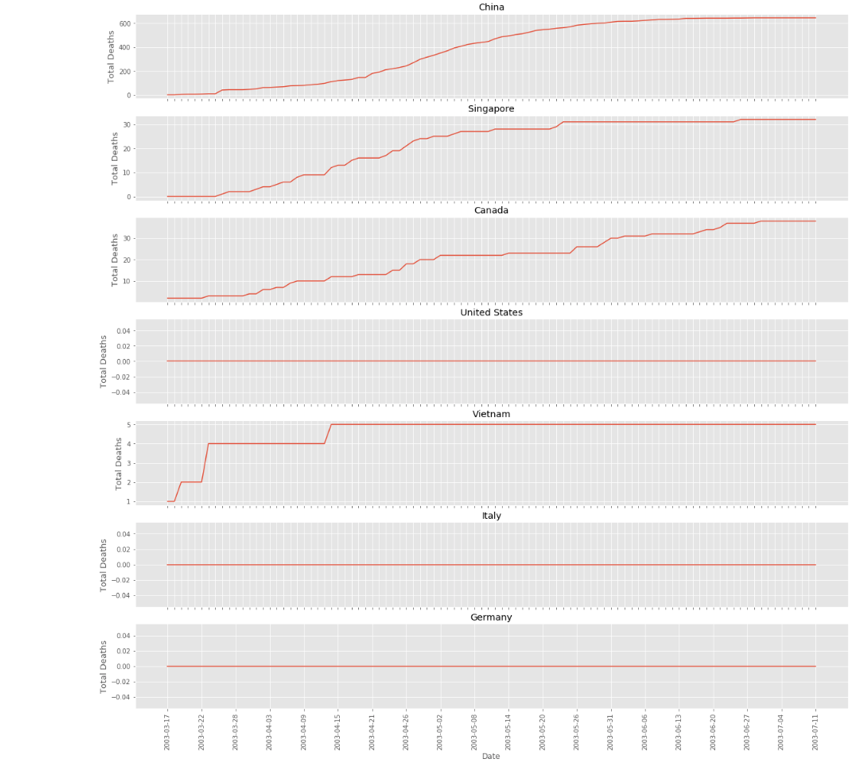

In [5]:
display_png(file = 'TSTD2003.png')

Time Series for the Cumulative Number of Cases during the COVID-19 Outbreak

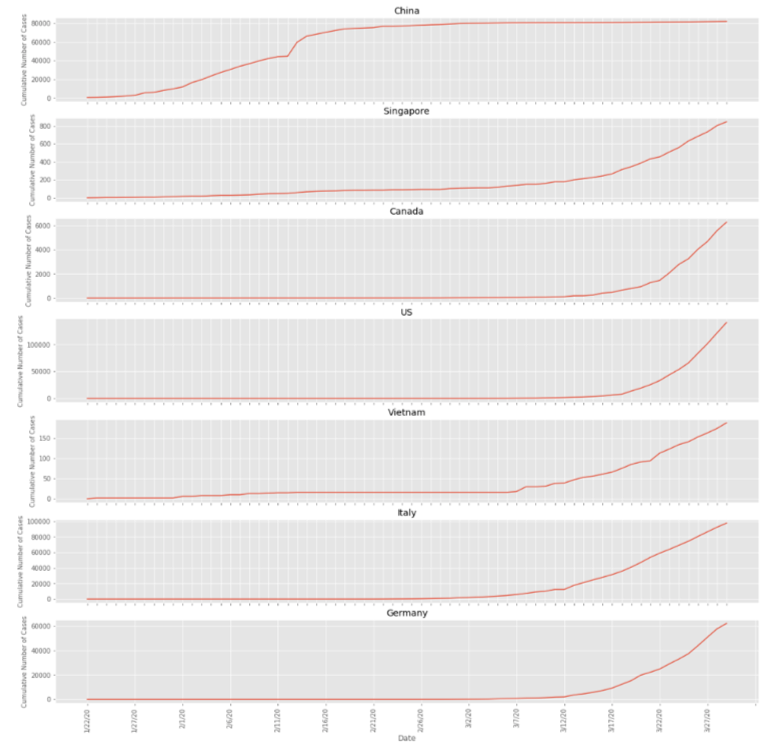

In [6]:
display_png(file = 'TSCC2020.png')

Time Series for the Cumulative Number of Deaths during the COVID-19 Outbreak

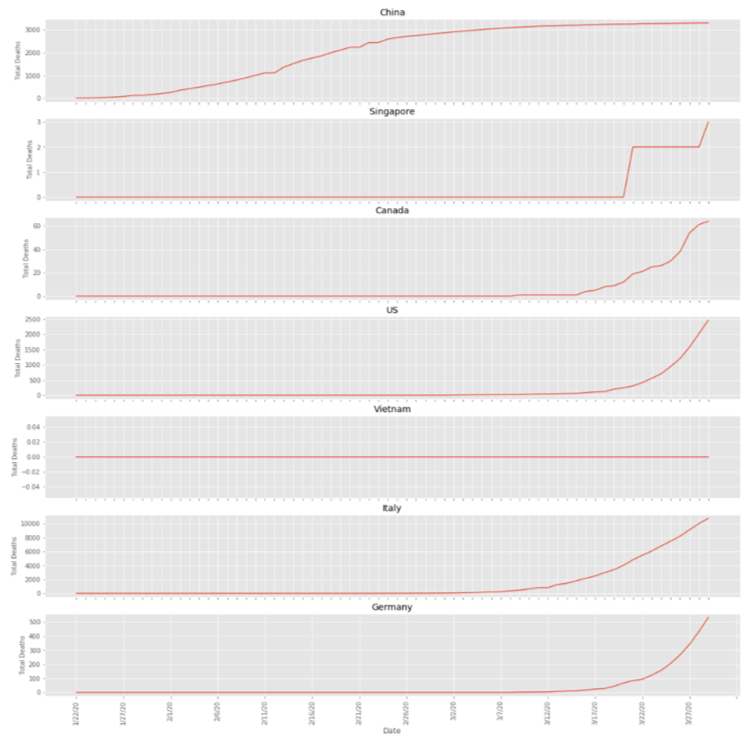

In [7]:
display_png(file = 'TSTD2020.png')

It is apparant that the COVID-19 outbreak has not concluded. Apart from China, all of the selected countires are displaying exponentially growing trends in the number of cumulative cases and in the number of total deaths. On the other hand, the SARS outbreak data displays a logisitic curve in the number of cumulative cases and total deaths over time. Germany, Italy, and the United States have not experienced a death in the SARS outbreak data. Vietnam has not experienced a death in the COVID-19 outbreak data. 

The histogram and boxplot are displaying the distribution of the number of cumulative cases, on the final day, in each selected country during the 2003 SARS outbreak. 

Skewness:  1.614755 
Kurtosis:  0.7856613

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,9,36.5,206,236,7084,1120.571,2631.596,7,0


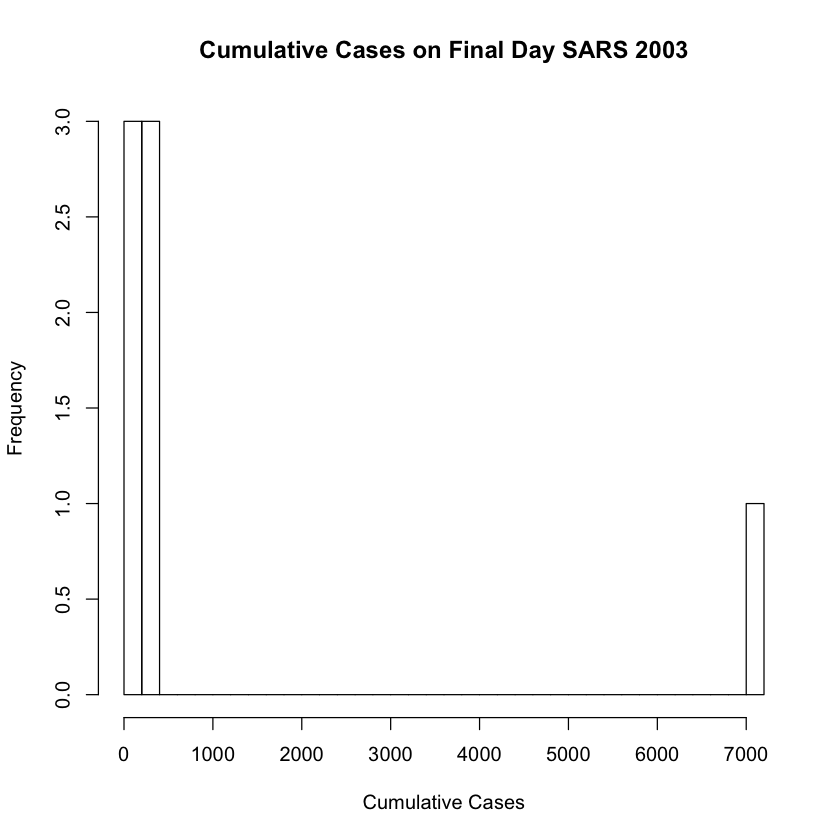

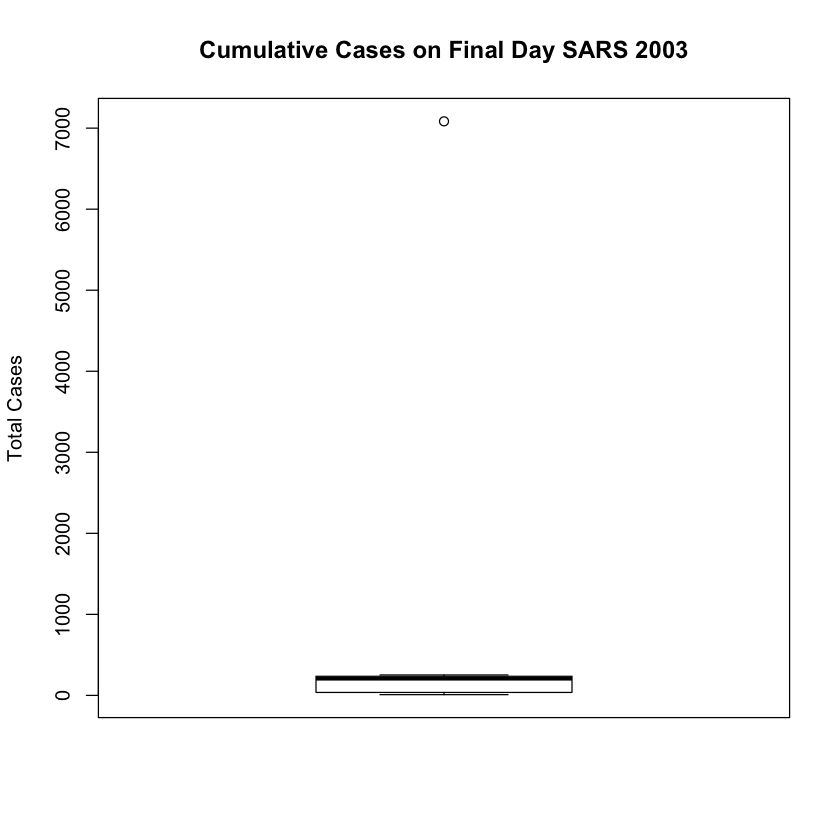

In [8]:
t2003 <- c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003, cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003)
hist(t2003, xlab ='Cumulative Cases', main = "Cumulative Cases on Final Day SARS 2003", breaks = 30)
skew <- skewness(t2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2003)
cat("Kurtosis: ", k)

favstats(t2003)
boxplot(t2003, ylab = "Total Cases", main = "Cumulative Cases on Final Day SARS 2003")

The distribution is positively skewed. It has heavier tails according to the kurtosis value. The number of cumulative cases in China seems to be an outlier. The outlier is removed in order to see how the distribution changes. 

The histogram and boxplot are displaying the distribution of the number of cumulative cases, on the final day, in each selected country during the 2003 SARS outbreak (excluding China). 

Skewness:  -0.02329566 
Kurtosis:  -2.186801

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,9,23.25,134.5,216.5,252,126.6667,111.5557,6,0


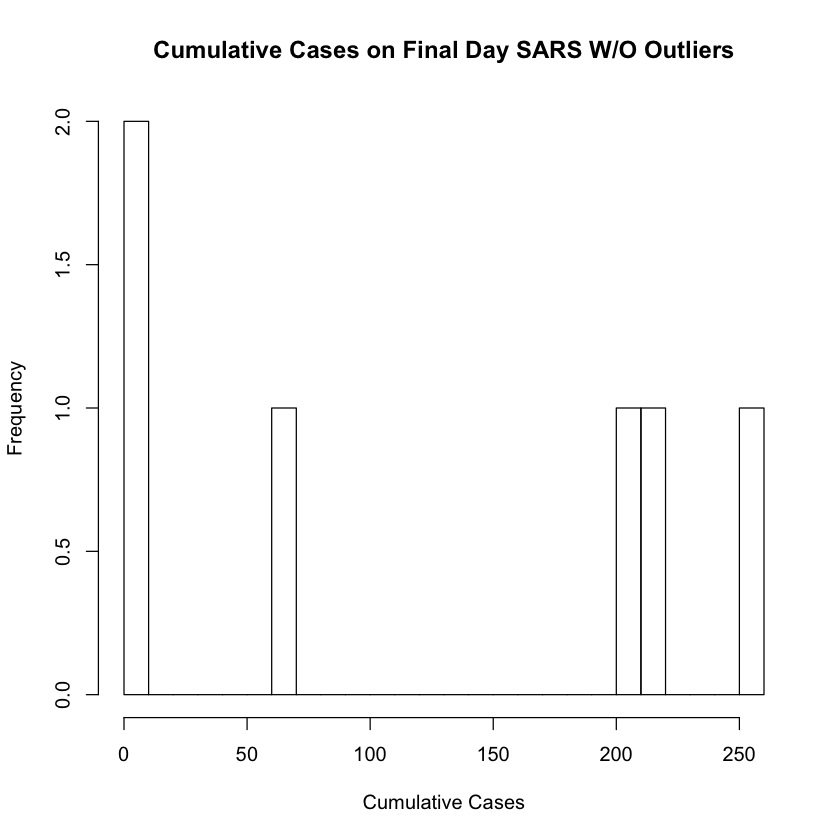

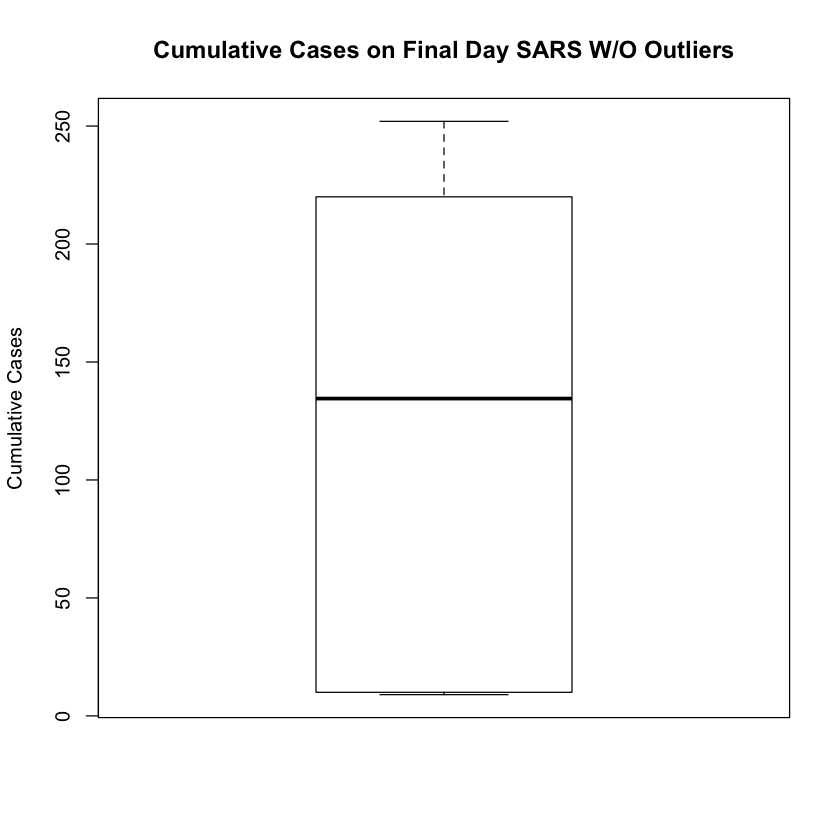

In [9]:
t2003_2 = c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003, cumulSC$US.2003, cumulSC$Vietnam.2003)
hist(t2003_2, xlab ='Cumulative Cases', main = "Cumulative Cases on Final Day SARS W/O Outliers", breaks = 20)
skew <- skewness(t2003_2)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2003_2)
cat("Kurtosis: ", k)

favstats(t2003_2)
boxplot(t2003_2, ylab = "Cumulative Cases", main = "Cumulative Cases on Final Day SARS W/O Outliers")

The skew decreased significantly after the removal of China's 2003 SARS cumulative case data. According to the skew value, the distribution is almost completely normal. The kurtosis value indicates that the new distribution has light tails.  

The histogram and boxplot are displaying the distribution of the number of cumulative cases, on March 29th (the last date included in the data), in each selected country during the 2020 COVID-19 outbreak. 

Skewness:  0.2142627 
Kurtosis:  -1.75893

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,188,3562,62095,89905.5,140886,55729.14,55214.49,7,0


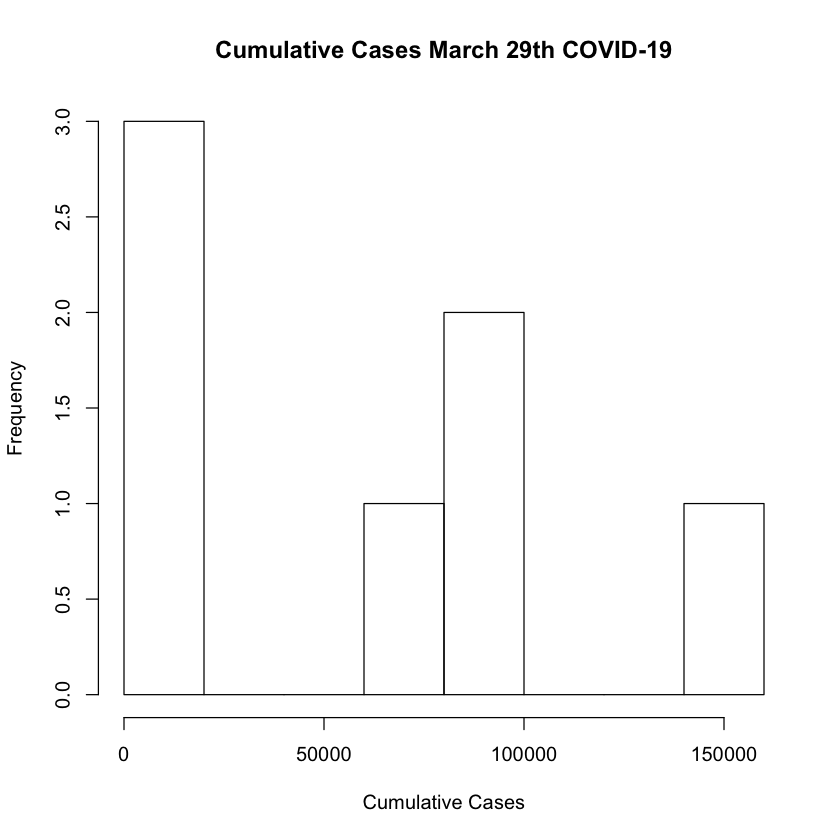

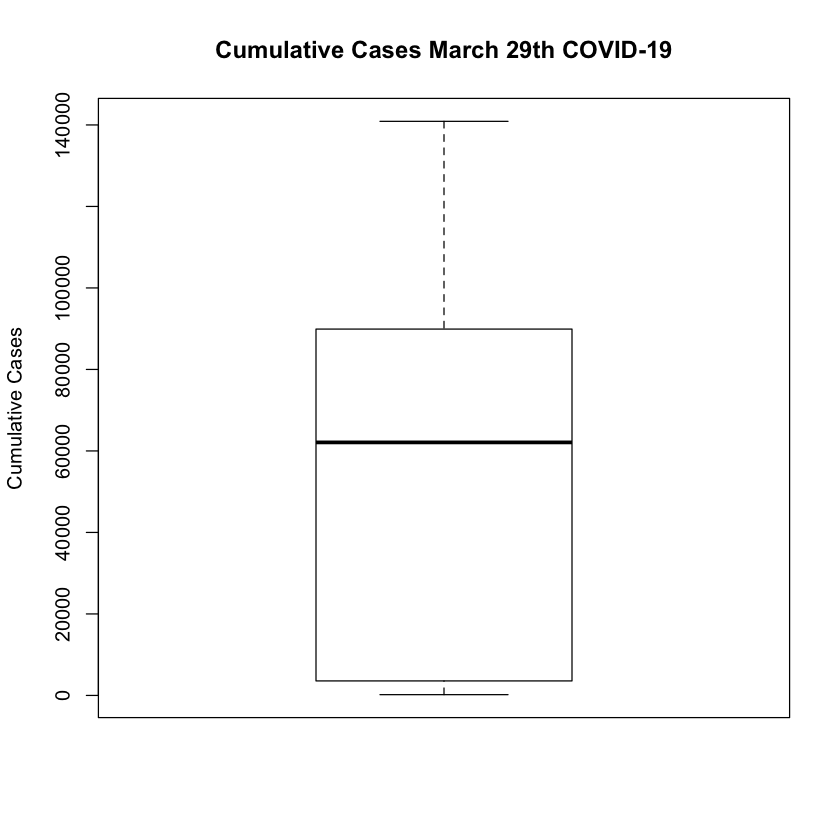

In [13]:
t2020 <- c(cumulSC$Canada.2020, cumulSC$Germany.2020, cumulSC$Italy.2020, cumulSC$Singapore.2020, cumulSC$US.2020, cumulSC$Vietnam.2020, cumulSC$China.2020)
hist(t2020, xlab ='Cumulative Cases', main = "Cumulative Cases March 29th COVID-19", breaks = 6)
skew <- skewness(t2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2020)
cat("Kurtosis: ", k)

favstats(t2020)
boxplot(t2020, ylab = "Cumulative Cases", main = "Cumulative Cases March 29th COVID-19")

The distribution is slightly positively skewed and is not completely normal. No outliers were found in this data. The kurtosis was a large negative value, which means that the distribution had light tails. 

The histogram and boxplot are displaying the distribution of the cumulative death totals, on the final day, in each selected country during the 2003 SARS outbreak.

Skewness:  1.60474 
Kurtosis:  0.764864

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,0,5,35,646,103,239.9812,7,0


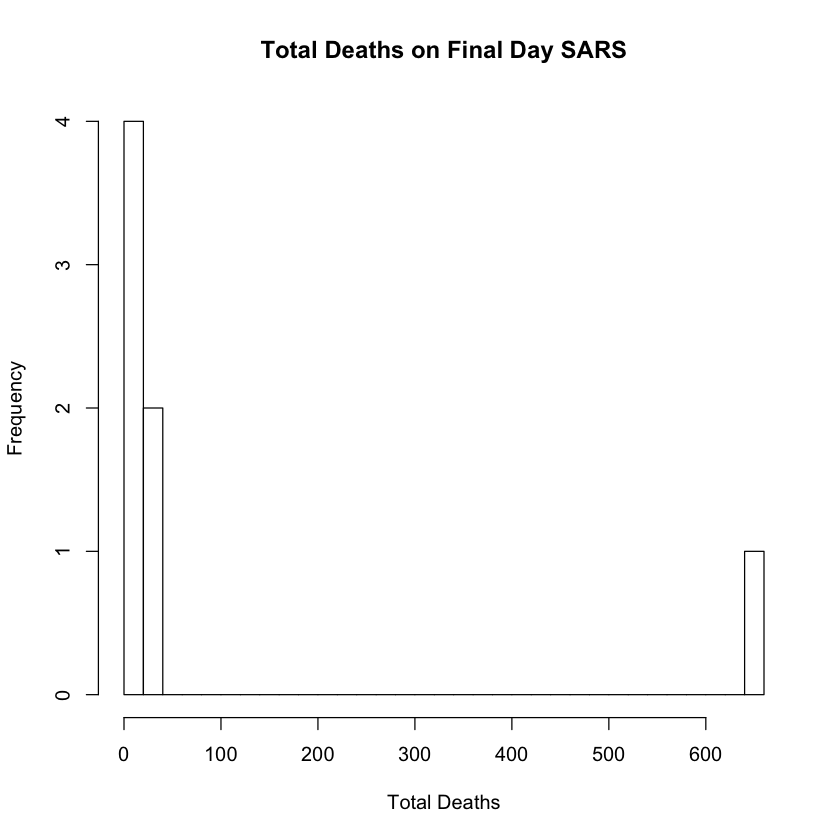

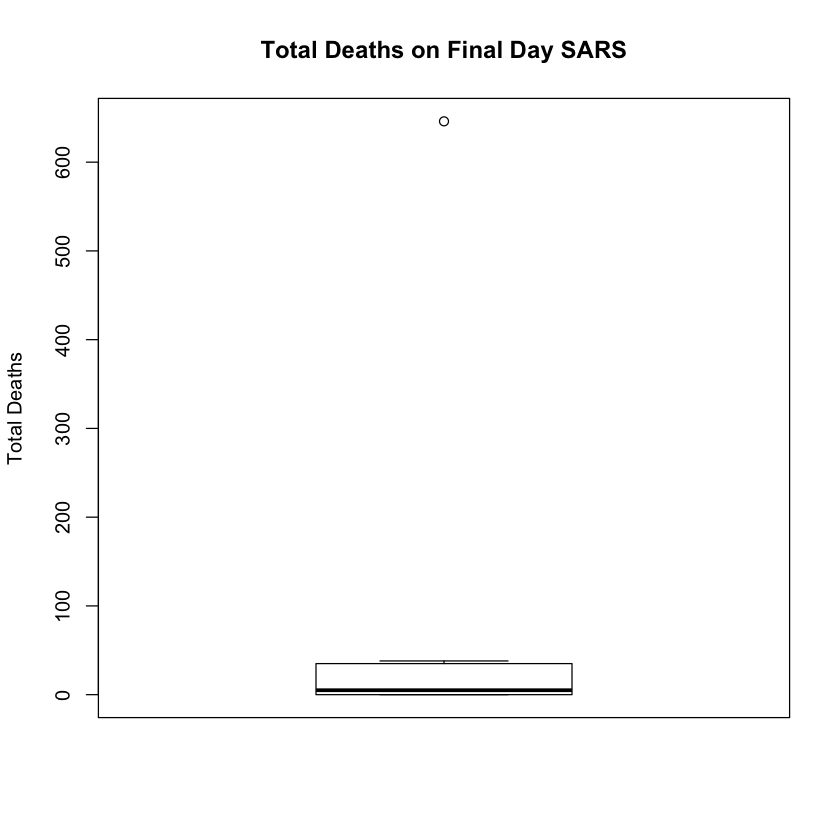

In [11]:
d2003 = c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003, totDLD$US.2003, totDLD$Vietnam.2003, totDLD$China.2003)
hist(d2003, xlab ='Total Deaths', main = "Total Deaths on Final Day SARS", breaks = 25)
skew <- skewness(d2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(d2003)
cat("Kurtosis: ", k)

favstats(d2003)
boxplot(d2003, ylab = "Total Deaths", main = "Total Deaths on Final Day SARS")

The distribution is positively skewed and has heavier tails. The total deaths in China seems to be an outlier. The outlier is removed in order to see how the distribution changes. 

The histogram and boxplot are displaying the distribution of the cumulative death totals, on the final day, in each selected country during the 2003 SARS outbreak (excluding China).

Skewness:  0.5380714 
Kurtosis:  -1.8913

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,0,2.5,25.25,38,12.5,17.63803,6,0


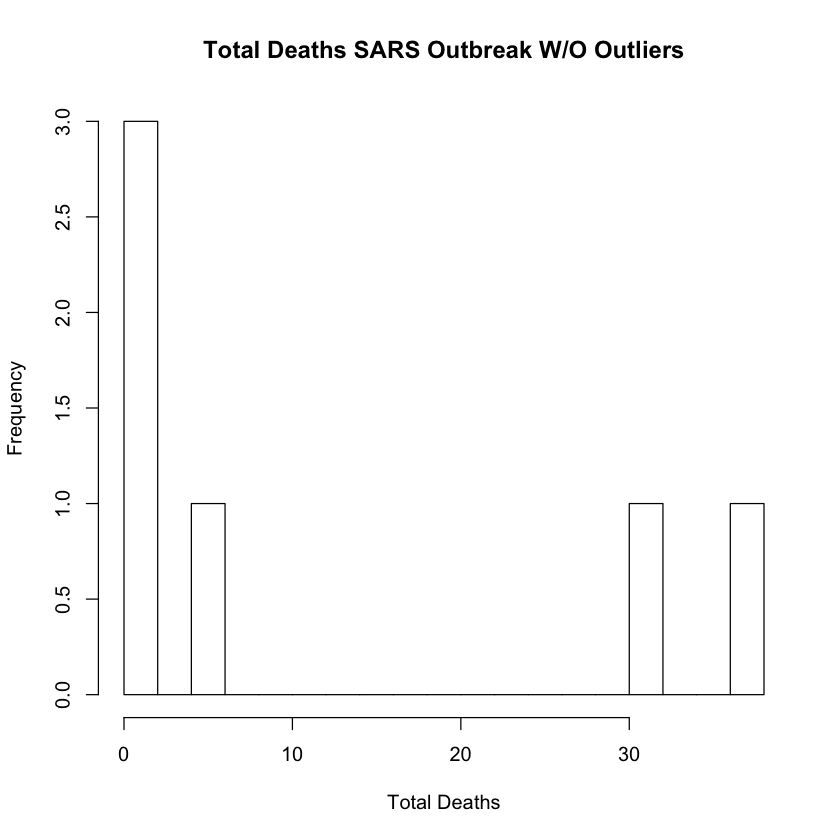

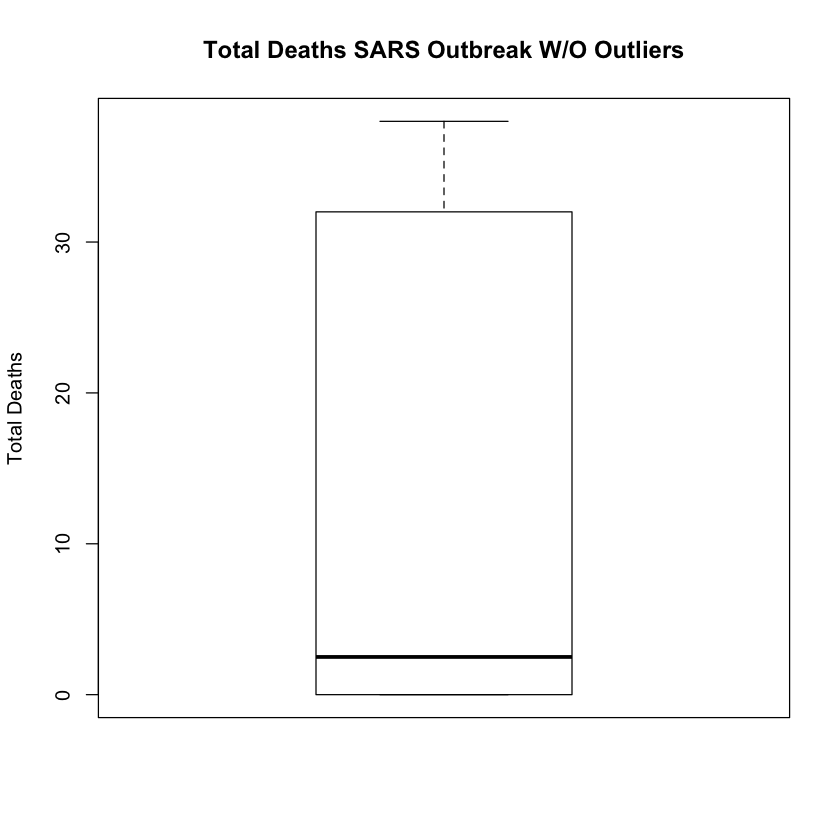

In [12]:
d2003 = c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003, totDLD$US.2003, totDLD$Vietnam.2003)
hist(d2003, xlab ='Total Deaths', main = "Total Deaths SARS Outbreak W/O Outliers", breaks = 15)
skew <- skewness(d2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(d2003)
cat("Kurtosis: ", k)

favstats(d2003)
boxplot(d2003, ylab = "Total Deaths", main = "Total Deaths SARS Outbreak W/O Outliers")

The removal of China created a new distribution with lighter tails. The distribution is still positively skewed. However, the removal of China significantly lowered the skewness of the data. 

The histogram and boxplot are displaying the distribution of the death totals on March 29th (the last date included in the data), in each selected country during the COVID-19 outbreak.

Skewness:  1.268456 
Kurtosis:  0.03153421

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,33.5,533,2885.5,10779,2450,3904.272,7,0


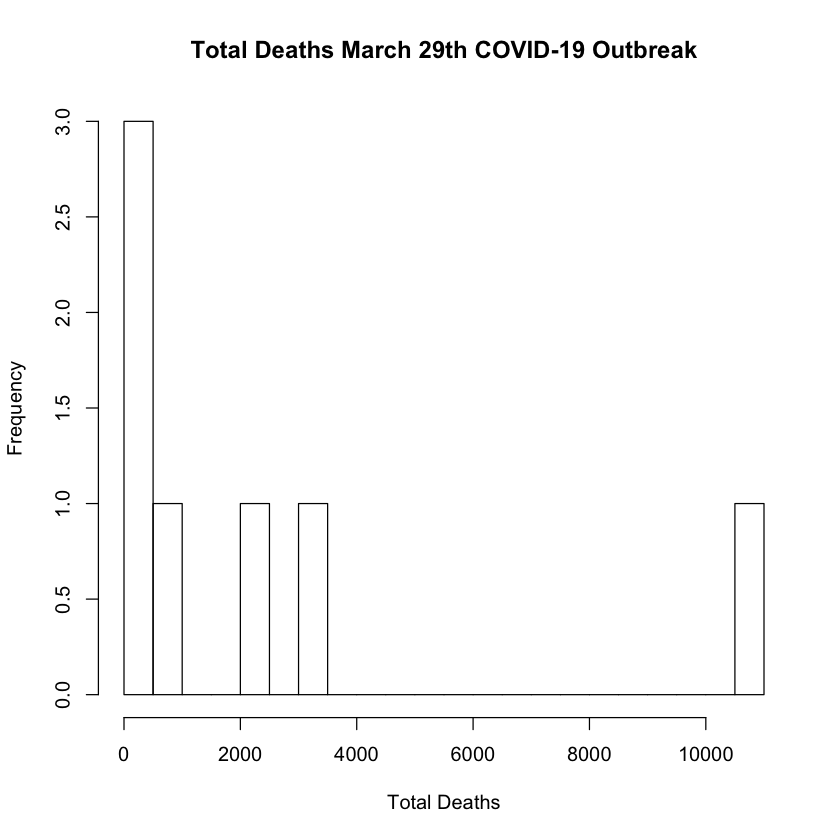

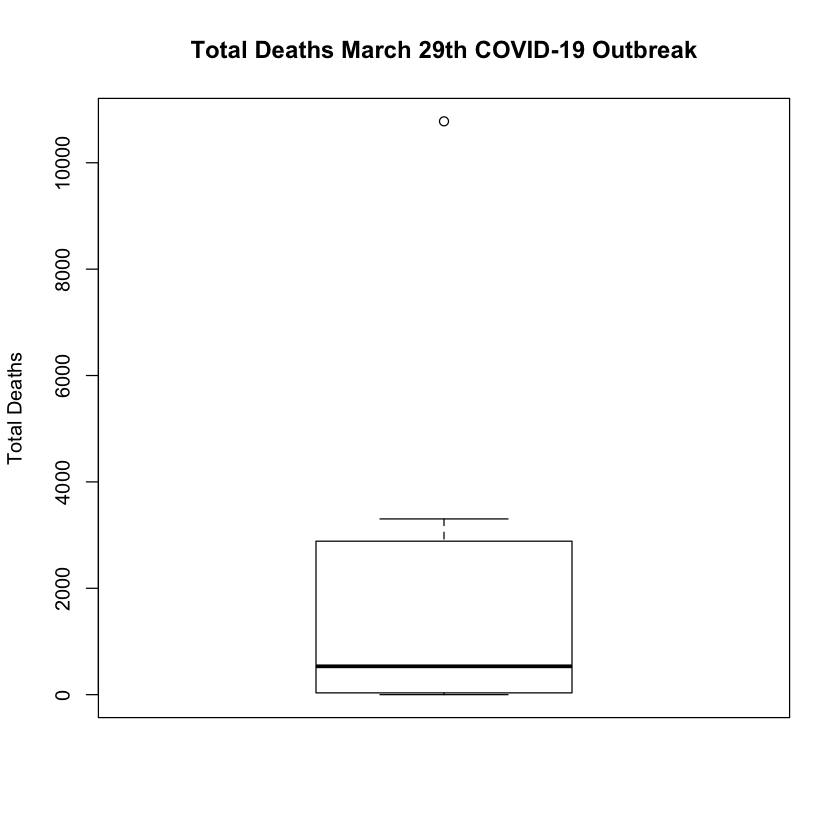

In [15]:
d2020 = c(totDLD$Canada.2020, totDLD$Germany.2020, totDLD$Italy.2020, totDLD$Singapore.2020, totDLD$US.2020, totDLD$Vietnam.2020, totDLD$China.2020)
hist(d2020, xlab ='Total Deaths', main = "Total Deaths March 29th COVID-19 Outbreak", breaks = 20)
skew <- skewness(d2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(d2020)
cat("Kurtosis: ", k)

favstats(d2020)
boxplot(d2020, ylab = "Total Deaths", main = "Total Deaths March 29th COVID-19 Outbreak")

The distribution is positively skewed. The kurtosis value indicates that the distribution does not have lighter or heavier tails.The total deaths in Italy seems to be an outlier. The outlier is removed in order to see how the distribution changes. 

The histogram and boxplot are displaying the distribution of the death totals on March 29th (the last date included in the data), in each selected country during the COVID-19 outbreak (excluding Italy).

Skewness:  0.5740831 
Kurtosis:  -1.767573

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,18.25,298.5,1983.5,3304,1061.833,1450.914,6,0


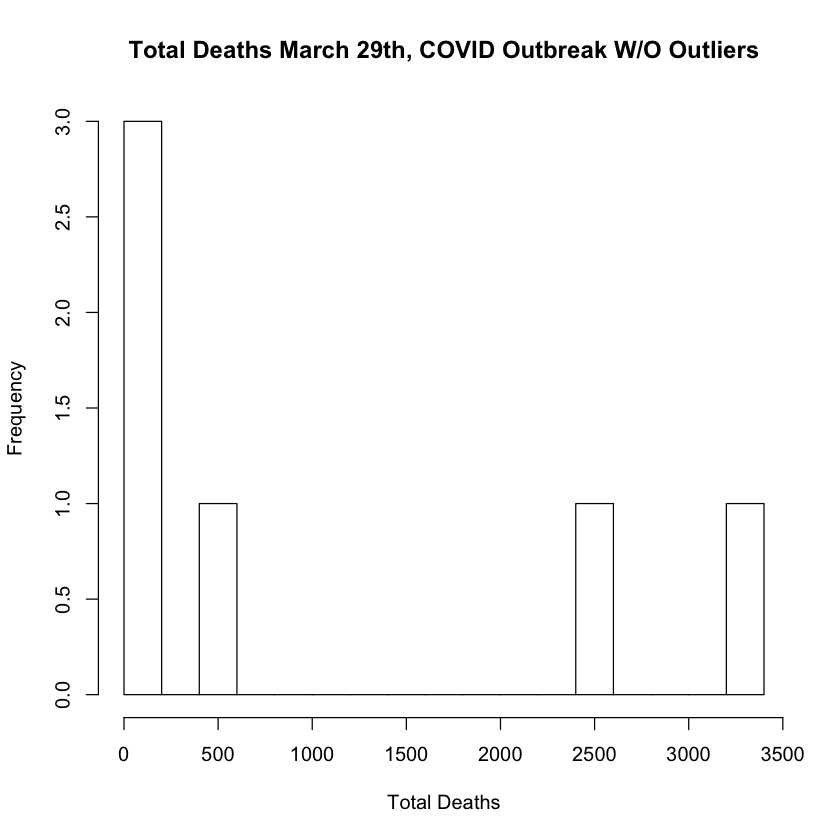

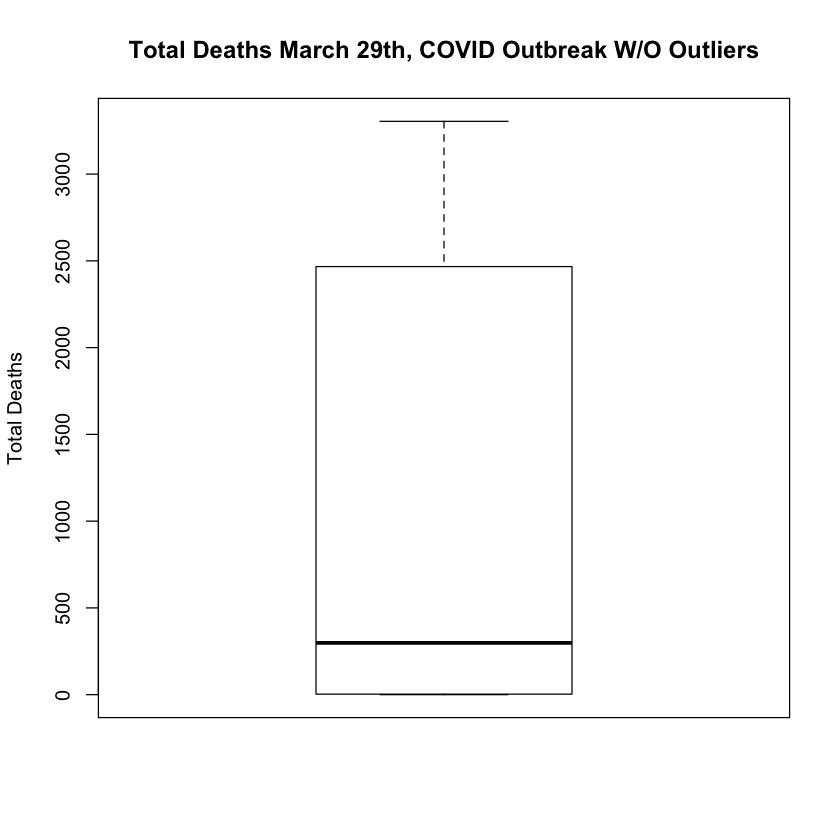

In [16]:
d2020 = c(totDLD$Canada.2020, totDLD$Germany.2020, totDLD$Singapore.2020, totDLD$US.2020, totDLD$Vietnam.2020, totDLD$China.2020)
hist(d2020, xlab ='Total Deaths', main = "Total Deaths March 29th, COVID Outbreak W/O Outliers", breaks = 15)
skew <- skewness(d2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(d2020)
cat("Kurtosis: ", k)

favstats(d2020)
boxplot(d2020, ylab = "Total Deaths", main = "Total Deaths March 29th, COVID Outbreak W/O Outliers")

The removal of Italy created a new distribution with lighter tails. The distribution is still positively skewed. However, the removal of Italy significantly lowered the skewness of the data. 

This loop calculates the percentage of the population that were infected by SARS in each selected country, on the final day of the outbreak. 

In [17]:
t2003 <- c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003, cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003)

pop <- c(31644028, 82534176, 57313203, 4114826, 290107933, 82301656, 1288000000)

for (i in 1:length(pop)) {
    t2003[i] <- t2003[i]/pop[i]
}
t2003

[1] 7.963588e-06 1.211619e-07 1.570319e-07 5.006287e-05 7.583384e-07
[6] 7.654767e-07 5.500000e-06

This dataframe shows the percentage of the population that were infected by SARS in each selected country, on the final day of the outbreak.

In [19]:
countries <- c("Canada", "Germany", "Italy", "Singapore", "United States", "Vietnam", "China")
per <- c(t2003[1], t2003[2], t2003[3], t2003[4], t2003[5], t2003[6], t2003[7])

perPopS <- data.frame("Countries: ", countries, "Percent Population: ", per)
perPopS

X.Countries...,countries,X.Percent.Population...,per
<fct>,<fct>,<fct>,<dbl>
Countries:,Canada,Percent Population:,7.963588e-06
Countries:,Germany,Percent Population:,1.211619e-07
Countries:,Italy,Percent Population:,1.570319e-07
Countries:,Singapore,Percent Population:,5.006287e-05
Countries:,United States,Percent Population:,7.583384e-07
Countries:,Vietnam,Percent Population:,7.654767e-07
Countries:,China,Percent Population:,5.500000e-06


The histogram and boxplot are displaying the distribution of the percentage of infected, on the final day of the outbreak, in each selected country during the SARS outbreak. 

Skewness:  1.528458 
Kurtosis:  0.6016141

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,1.211619e-07,4.576852e-07,7.654767e-07,6.731794e-06,5.006287e-05,9.332638e-06,1.821846e-05,7,0


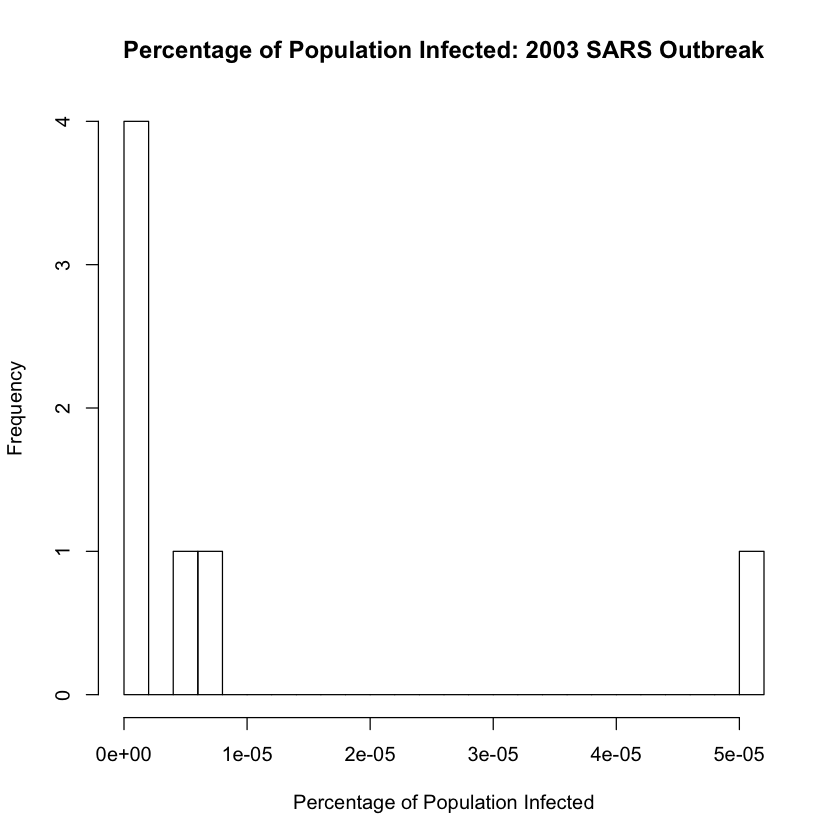

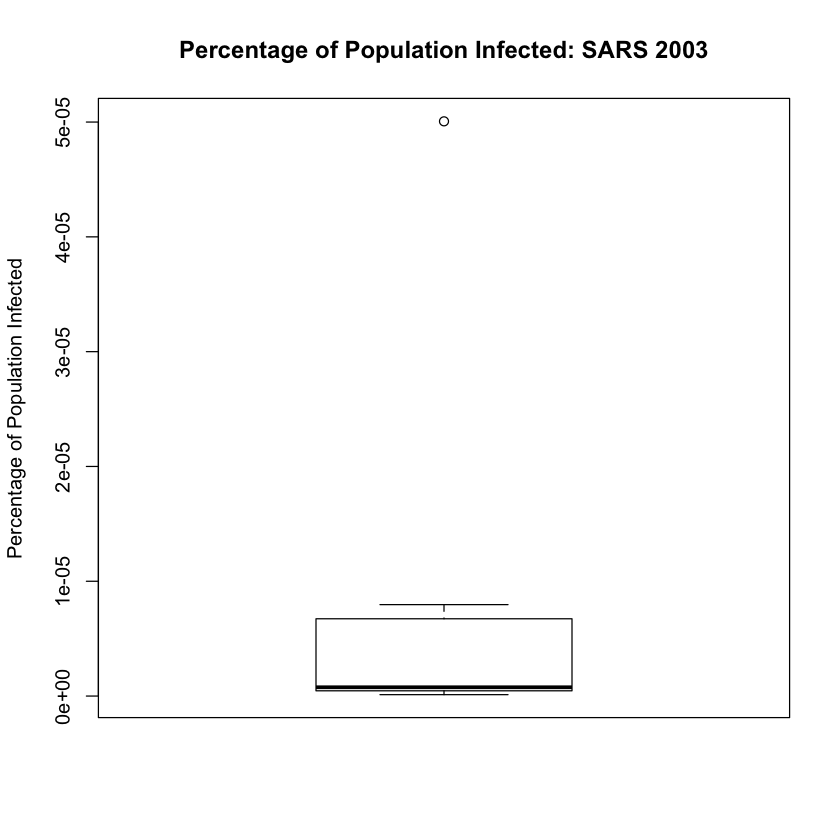

In [20]:
hist(t2003, xlab ='Percentage of Population Infected', main = "Percentage of Population Infected: 2003 SARS Outbreak", breaks = 30)
skew <- skewness(t2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2003)
cat("Kurtosis: ", k)

favstats(t2003)
boxplot(t2003, ylab = "Percentage of Population Infected", main = "Percentage of Population Infected: SARS 2003")

The distribution is positively skewed. The kurtosis value indicates that the distribution has heavier tails. The percentage of infected population in Singapore seems to be an outlier. The outlier is removed in order to see how the distribution changes.

In [21]:
t2003 <- c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003)

pop <- c(31644028, 82534176, 57313203, 290107933, 82301656, 1288000000)

for (i in 1:length(pop)) {
    t2003[i] <- t2003[i]/pop[i]
}
t2003

[1] 7.963588e-06 1.211619e-07 1.570319e-07 7.583384e-07 7.654767e-07
[6] 5.500000e-06

The histogram and boxplot are displaying the distribution of the percentage of infected, on the final day of the outbreak, in each selected country during the SARS outbreak (excluding Singapore).

Skewness:  0.6479129 
Kurtosis:  -1.638226

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,1.211619e-07,3.073585e-07,7.619076e-07,4.316369e-06,7.963588e-06,2.544266e-06,3.347517e-06,6,0


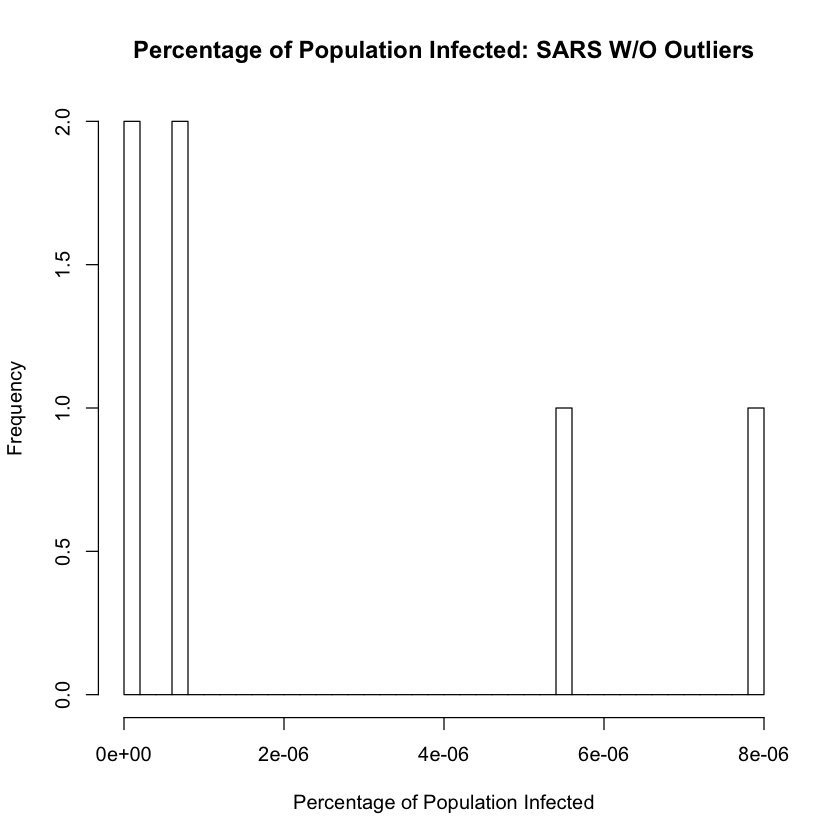

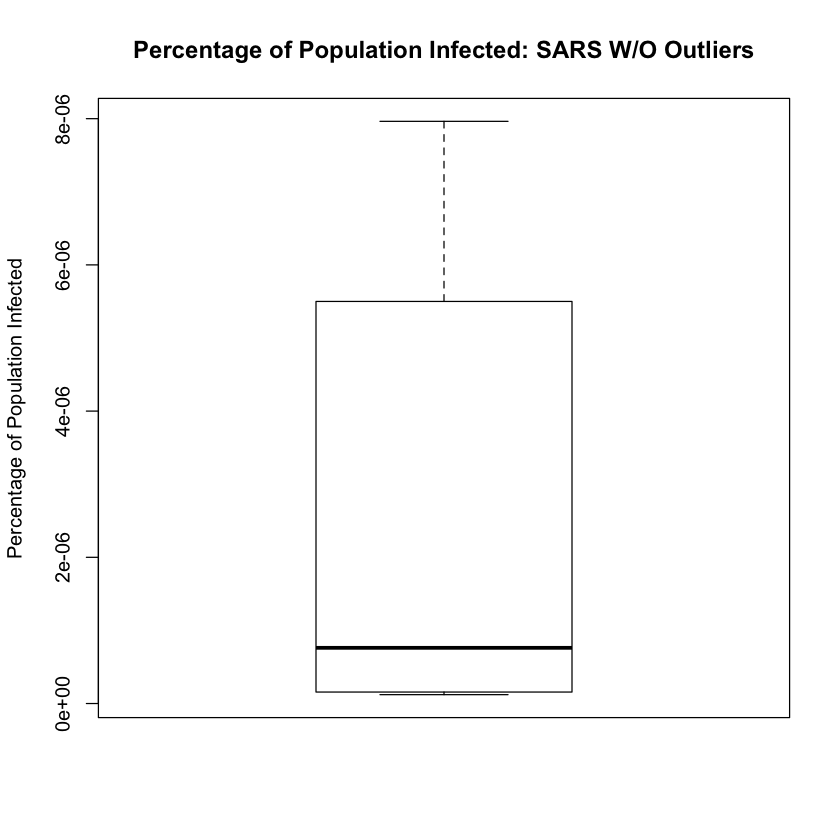

In [29]:
hist(t2003, xlab ='Percentage of Population Infected', main = "Percentage of Population Infected: SARS W/O Outliers", breaks = 30)
skew <- skewness(t2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2003)
cat("Kurtosis: ", k)

favstats(t2003)
boxplot(t2003, ylab = "Percentage of Population Infected", main = "Percentage of Population Infected: SARS W/O Outliers")

The removal of Singapore created an new distribution with lighter tails. The distribution is still positively skewed. However, the removal of Singapore significantly lowered the skewness of the data. A new outlier appears in this distribution. The outlier is Canada. 

This for loop finds the percentage of confirmed cases that resulted in deaths during the 2003 SARS outbreak. 

In [25]:
td2003 <- c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003, cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003)

d2003 <- c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003, totDLD$US.2003, totDLD$Vietnam.2003, totDLD$China.2003)

for (i in 1:length(d2003)) {
    td2003[i] <- d2003[i]/td2003[i]
}

td2003

[1] 0.15079365 0.00000000 0.00000000 0.15533981 0.00000000 0.07936508 0.09119142

This dataframe shows the percentage of confirmed cases that resulted in deaths during the 2003 SARS outbreak.

In [26]:
countries <- c("Canada", "Germany", "Italy", "Singapore", "United States", "Vietnam", "China")
per <- c(td2003[1], td2003[2], td2003[3], td2003[4], td2003[5], td2003[6], td2003[7])

perCD <- data.frame("Countries: ", countries, "Percent Population: ", per)
perCD

X.Countries...,countries,X.Percent.Population...,per
<fct>,<fct>,<fct>,<dbl>
Countries:,Canada,Percent Population:,0.15079365
Countries:,Germany,Percent Population:,0.00000000
Countries:,Italy,Percent Population:,0.00000000
Countries:,Singapore,Percent Population:,0.15533981
Countries:,United States,Percent Population:,0.00000000
Countries:,Vietnam,Percent Population:,0.07936508
Countries:,China,Percent Population:,0.09119142


The histogram and boxplot are displaying the distribution of the percentage of confirmed cases that resulted in deaths in each country during the SARS outbreak.

Skewness:  0.125633 
Kurtosis:  -1.964987

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,0,0.07936508,0.1209925,0.1553398,0.06809856,0.06954851,7,0


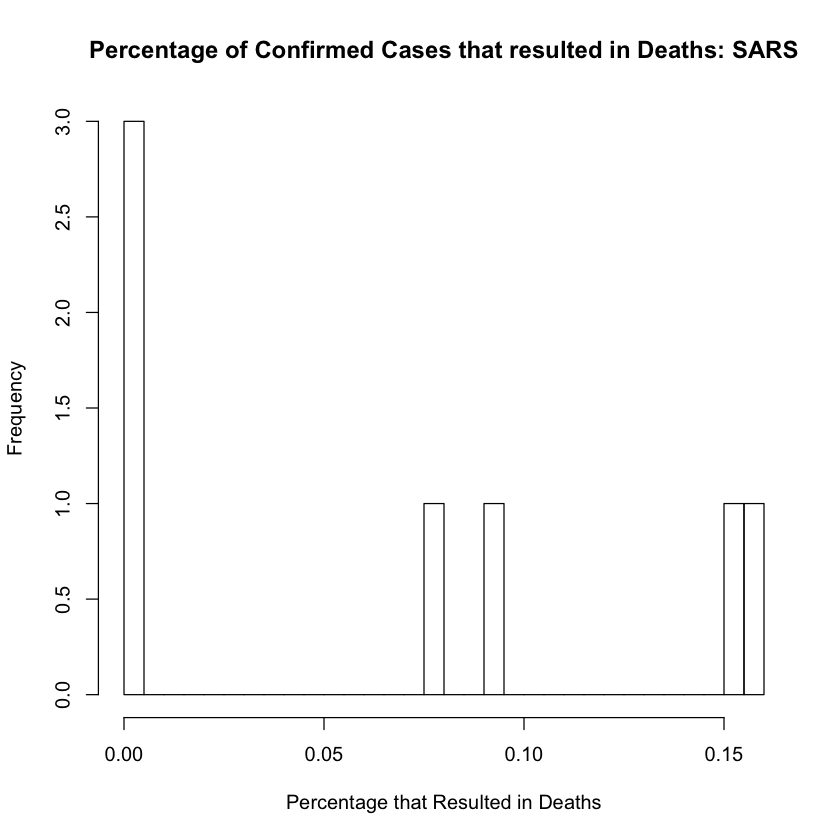

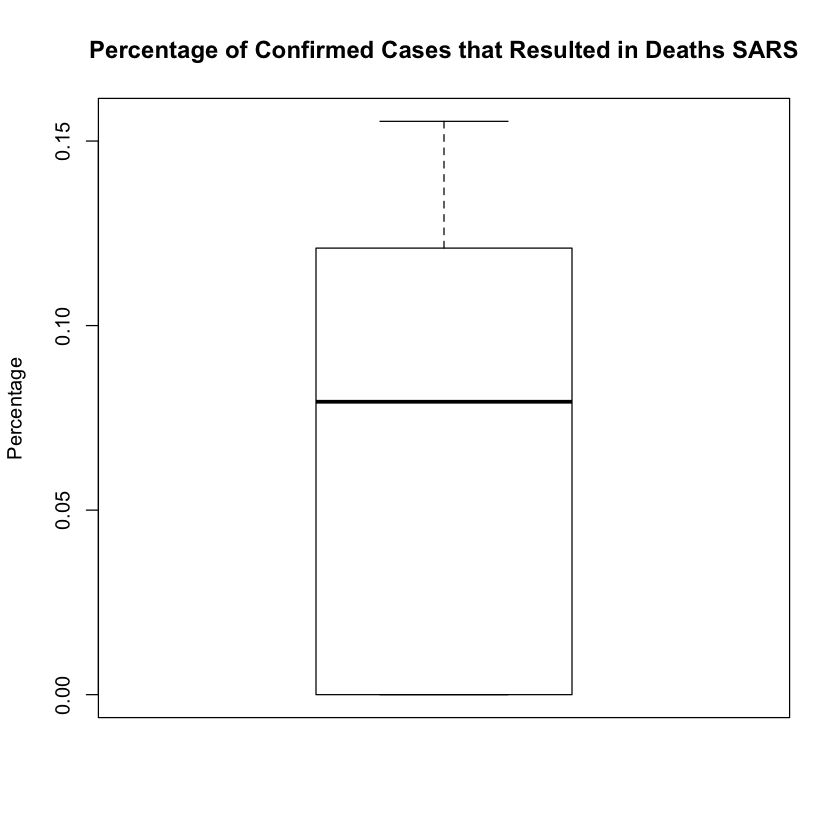

In [28]:
hist(td2003, xlab ='Percentage that Resulted in Deaths', main = "Percentage of Confirmed Cases that resulted in Deaths: SARS", breaks = 30)
skew <- skewness(td2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(td2003)
cat("Kurtosis: ", k)

favstats(td2003)
boxplot(td2003, ylab = "Percentage", main = "Percentage of Confirmed Cases that Resulted in Deaths SARS")

The distribution is slightly positively skewed. The kurtosis value indicates that the distribution has lighter tails. 
There are no outliers for this distribution. Singapore has the highest percentage of confirmed cases resulting in deaths, but Canada is a close second. 

This loop calculates the percentage of the population that were infected by COVID-19 in each country, cumulatively, on March 29th, 2020. 

In [30]:
t2020 <- c(cumulSC$Canada.2020, cumulSC$Germany.2020, cumulSC$Italy.2020, cumulSC$Singapore.2020, cumulSC$US.2020, cumulSC$Vietnam.2020, cumulSC$China.2020)

pop <- c(37057765, 82905782, 60421760, 5638676, 326687501, 95540395, 1393000000)

for (i in 1:length(pop)) {
    t2020[i] <- t2020[i]/pop[i]
}
t2020

[1] 1.694652e-04 7.489827e-04 1.616785e-03 1.496805e-04 4.312562e-04
[6] 1.967754e-06 5.895334e-05

This dataframe shows the percentage of the population that were infected by COVID-19 in each country, by March 29, 2020. 

In [31]:
countries <- c("Canada", "Germany", "Italy", "Singapore", "United States", "Vietnam", "China")
per <- c(t2020[1], t2020[2], t2020[3], t2020[4], t2020[5], t2020[6], t2020[7])

perPopS <- data.frame("Countries: ", countries, "Percent Population: ", per)
perPopS

X.Countries...,countries,X.Percent.Population...,per
<fct>,<fct>,<fct>,<dbl>
Countries:,Canada,Percent Population:,1.694652e-04
Countries:,Germany,Percent Population:,7.489827e-04
Countries:,Italy,Percent Population:,1.616785e-03
Countries:,Singapore,Percent Population:,1.496805e-04
Countries:,United States,Percent Population:,4.312562e-04
Countries:,Vietnam,Percent Population:,1.967754e-06
Countries:,China,Percent Population:,5.895334e-05


The histogram and boxplot are displaying the distribution of the percentage of infected in each selected country during the COVID-19 outbreak (up to March 29, 2020).

Skewness:  1.055147 
Kurtosis:  -0.4679947

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,1.967754e-06,0.0001043169,0.0001694652,0.0005901195,0.001616785,0.0004538701,0.0005735222,7,0


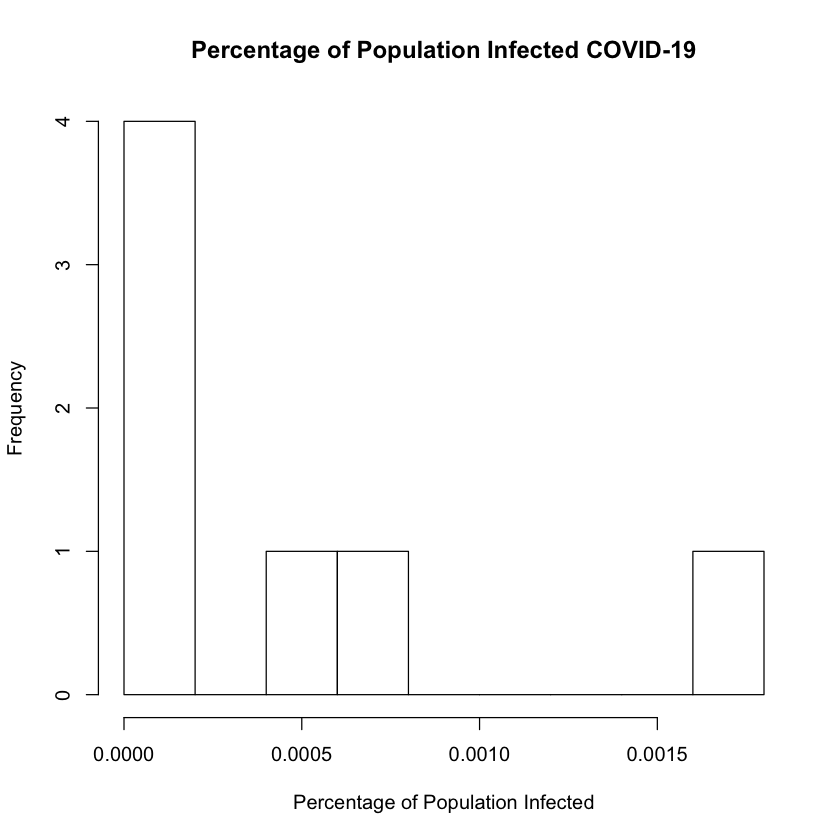

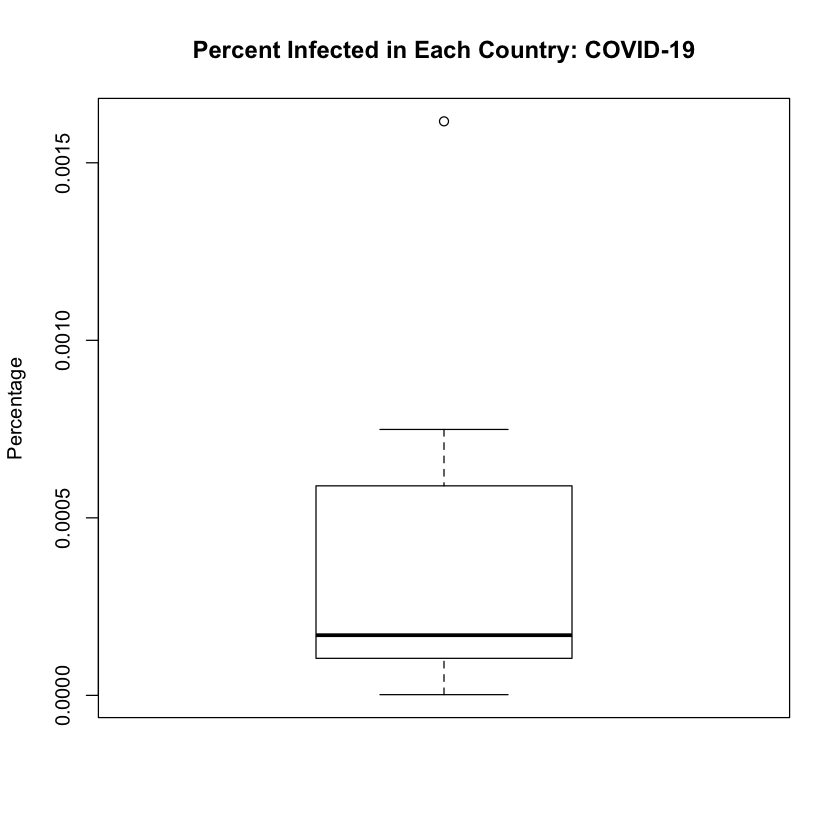

In [32]:
hist(t2020, xlab ='Percentage of Population Infected', main = "Percentage of Population Infected COVID-19", breaks = 6)
skew <- skewness(t2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2020)
cat("Kurtosis: ", k)

favstats(t2020)
boxplot(t2020, ylab = "Percentage", main = "Percent Infected in Each Country: COVID-19")

The distribution is positively skewed. The kurtosis value indicates that the distribution has lighter tails. The percentage of infected population in Italy seems to be an outlier. The outlier is removed in order to see how the distribution changes.

In [33]:
t2020 <- c(cumulSC$Canada.2020, cumulSC$Germany.2020, cumulSC$Singapore.2020, cumulSC$US.2020, cumulSC$Vietnam.2020, cumulSC$China.2020)

pop <- c(37057765, 82905782, 5638676, 326687501, 95540395, 1393000000)

for (i in 1:length(pop)) {
    t2020[i] <- t2020[i]/pop[i]
}
t2020

[1] 1.694652e-04 7.489827e-04 1.496805e-04 4.312562e-04 1.967754e-06
[6] 5.895334e-05

The histogram and boxplot are displaying the distribution of the percentage of infected in each country during the COVID-19 outbreak (excluding Italy). The data is up to March 29, 2020. 

Skewness:  0.7070849 
Kurtosis:  -1.289963

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,1.967754e-06,8.163514e-05,0.0001595728,0.0003658084,0.0007489827,0.0002600509,0.0002813539,6,0


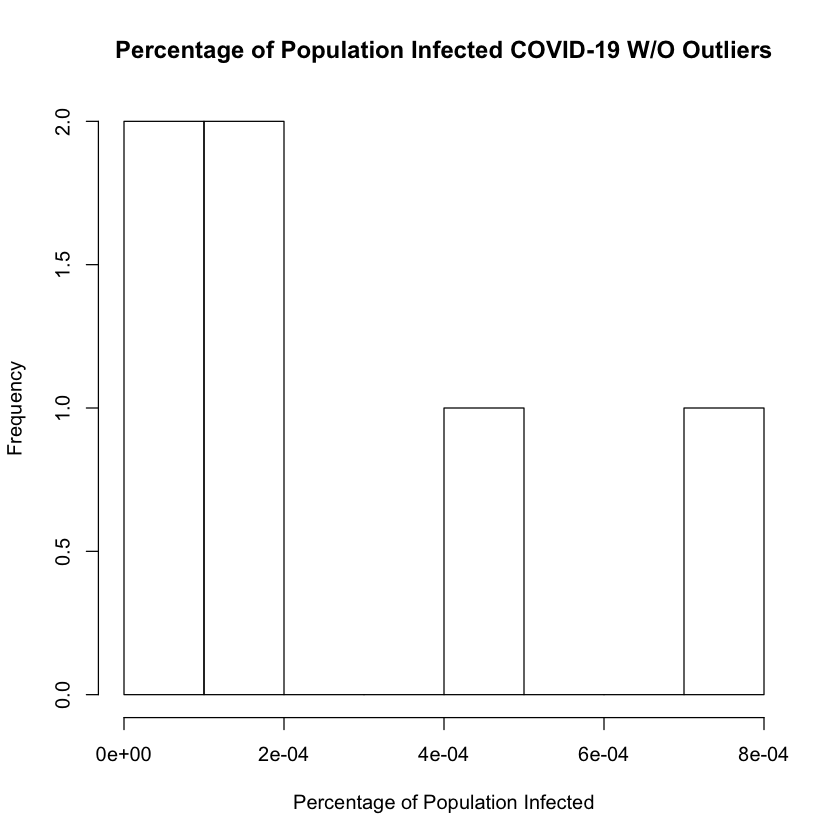

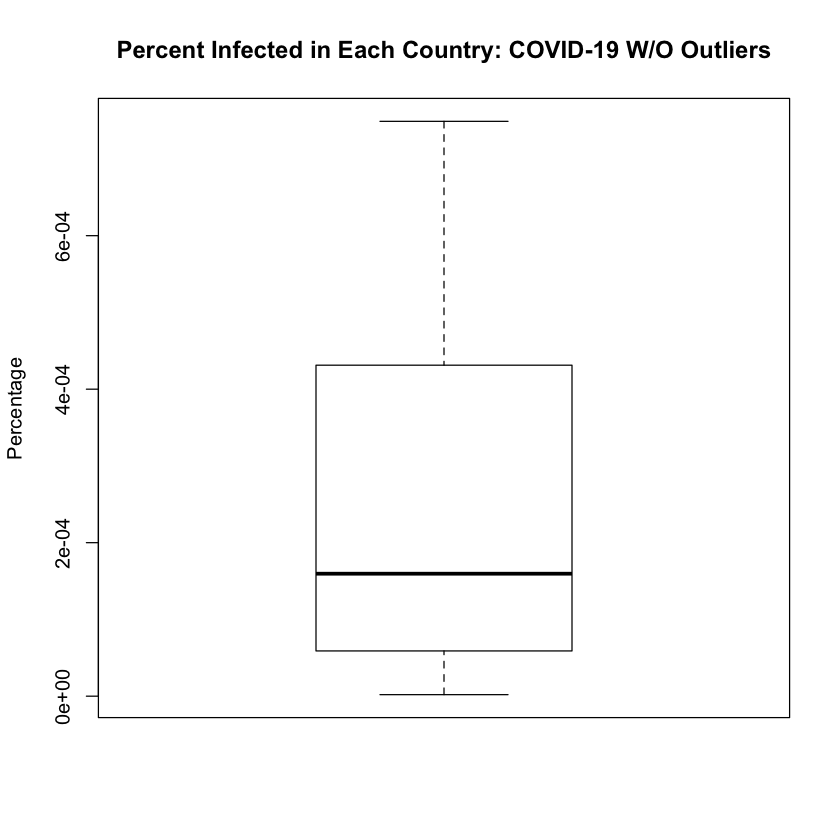

In [40]:
hist(t2020, xlab ='Percentage of Population Infected', main = "Percentage of Population Infected COVID-19 W/O Outliers", breaks = 6)
skew <- skewness(t2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2020)
cat("Kurtosis: ", k)

favstats(t2020)
boxplot(t2020, ylab = "Percentage", main = "Percent Infected in Each Country: COVID-19 W/O Outliers")

With the removal of Italy, the tails became lighter and the skew became smaller. However, the skew stayed positive. 

This for loop finds the percentage of confirmed cases that resulted in deaths during the COVID-19 outbreak (up to March 29, 2020).  

In [41]:
td2020 <- c(cumulSC$Canada.2020, cumulSC$Germany.2020, cumulSC$Italy.2020, cumulSC$Singapore.2020, cumulSC$US.2020, cumulSC$Vietnam.2020, cumulSC$China.2020)

d2020 <- c(totDLD$Canada.2020, totDLD$Germany.2020, totDLD$Italy.2020, totDLD$Singapore.2020, totDLD$US.2020, totDLD$Vietnam.2020, totDLD$China.2020)

for (i in 1:length(d2020)) {
    td2020[i] <- d2020[i]/td2020[i]
}

td2020

[1] 0.010191083 0.008583622 0.110339956 0.003554502 0.017510611 0.000000000
[7] 0.040232824

This dataframe shows the percentage of confirmed cases that resulted in deaths during the COVID-19 outbreak (up to March 29, 2020).

In [42]:
countries <- c("Canada", "Germany", "Italy", "Singapore", "United States", "Vietnam", "China")
per <- c(td2020[1], td2020[2], td2020[3], td2020[4], td2020[5], td2020[6], td2020[7])

perCD <- data.frame("Countries: ", countries, "Percent Population: ", per)
perCD

X.Countries...,countries,X.Percent.Population...,per
<fct>,<fct>,<fct>,<dbl>
Countries:,Canada,Percent Population:,0.010191083
Countries:,Germany,Percent Population:,0.008583622
Countries:,Italy,Percent Population:,0.110339956
Countries:,Singapore,Percent Population:,0.003554502
Countries:,United States,Percent Population:,0.017510611
Countries:,Vietnam,Percent Population:,0.000000000
Countries:,China,Percent Population:,0.040232824


The histogram and boxplot are displaying the distribution of the percentage of confirmed cases that resulted in deaths in each selected country during the COVID-19 outbreak. The data is up to March 29, 2020. 

Skewness:  1.282536 
Kurtosis:  0.02826117

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,0.006069062,0.01019108,0.02887172,0.11034,0.0272018,0.03896754,7,0


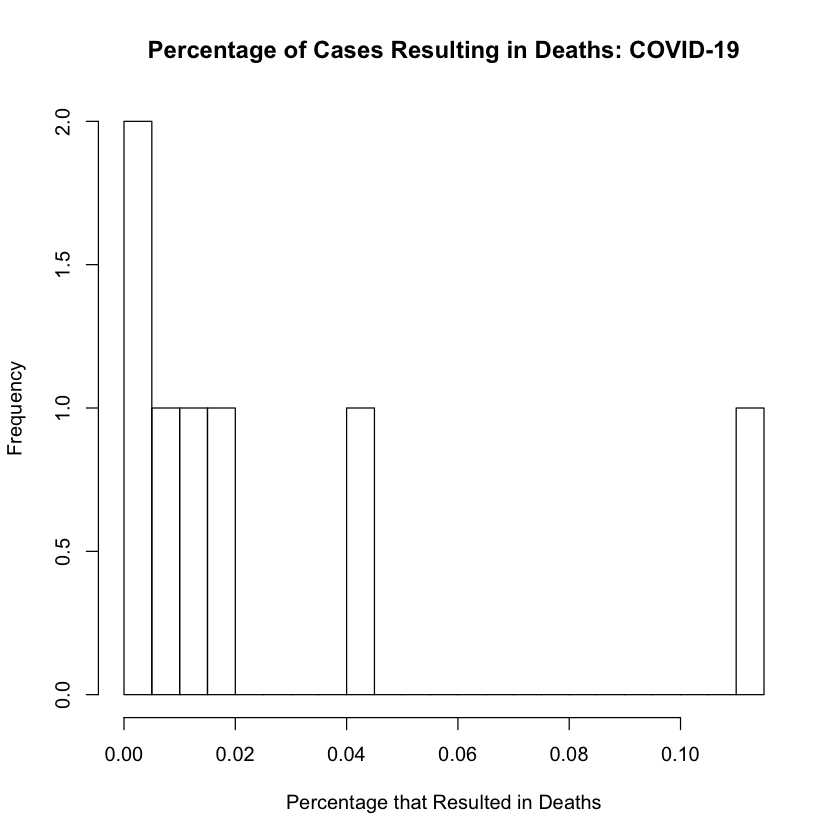

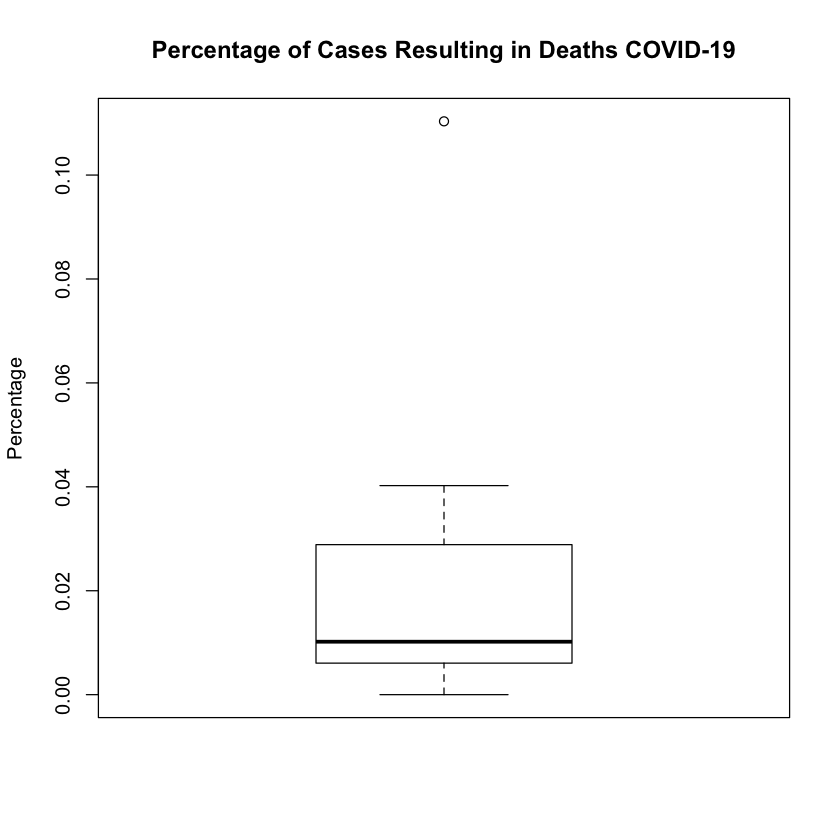

In [44]:
hist(td2020, xlab ='Percentage that Resulted in Deaths', main = "Percentage of Cases Resulting in Deaths: COVID-19", breaks = 30)
skew <- skewness(td2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(td2020)
cat("Kurtosis: ", k)

favstats(td2020)
boxplot(td2020, ylab = "Percentage", main = "Percentage of Cases Resulting in Deaths COVID-19")

The distribution is positively skewed. The kurtosis value indicates that the distribution has heavier tails. The percentage of cases resulting in deaths in Italy seems to be an outlier. The outlier is removed in order to see how the distribution changes.

In [45]:
td2020 <- c(cumulSC$Canada.2020, cumulSC$Germany.2020, cumulSC$Singapore.2020, cumulSC$US.2020, cumulSC$Vietnam.2020, cumulSC$China.2020)

d2020 <- c(totDLD$Canada.2020, totDLD$Germany.2020, totDLD$Singapore.2020, totDLD$US.2020, totDLD$Vietnam.2020, totDLD$China.2020)

for (i in 1:length(d2020)) {
    td2020[i] <- d2020[i]/td2020[i]
}

td2020

[1] 0.010191083 0.008583622 0.003554502 0.017510611 0.000000000 0.040232824

The histogram and boxplot are displaying the distribution of the percentage of confirmed cases that resulted in deaths in each selected country during the COVID-19 outbreak (excluding Italy). The data is up to March 29, 2020.

Skewness:  0.8832466 
Kurtosis:  -0.8539844

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,0.004811782,0.009387352,0.01568073,0.04023282,0.01334544,0.01446975,6,0


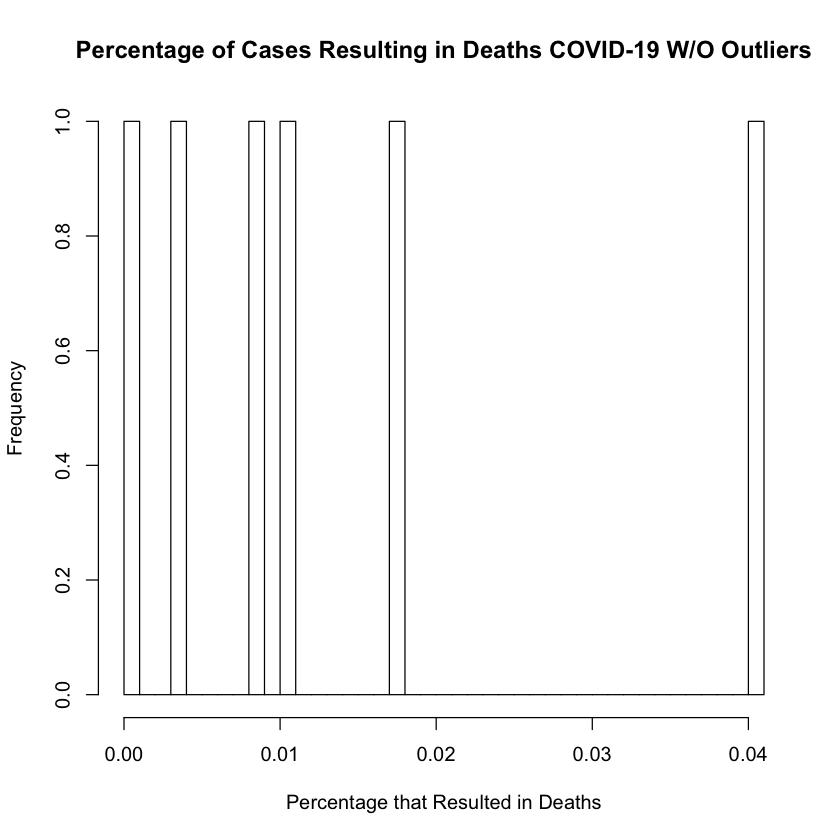

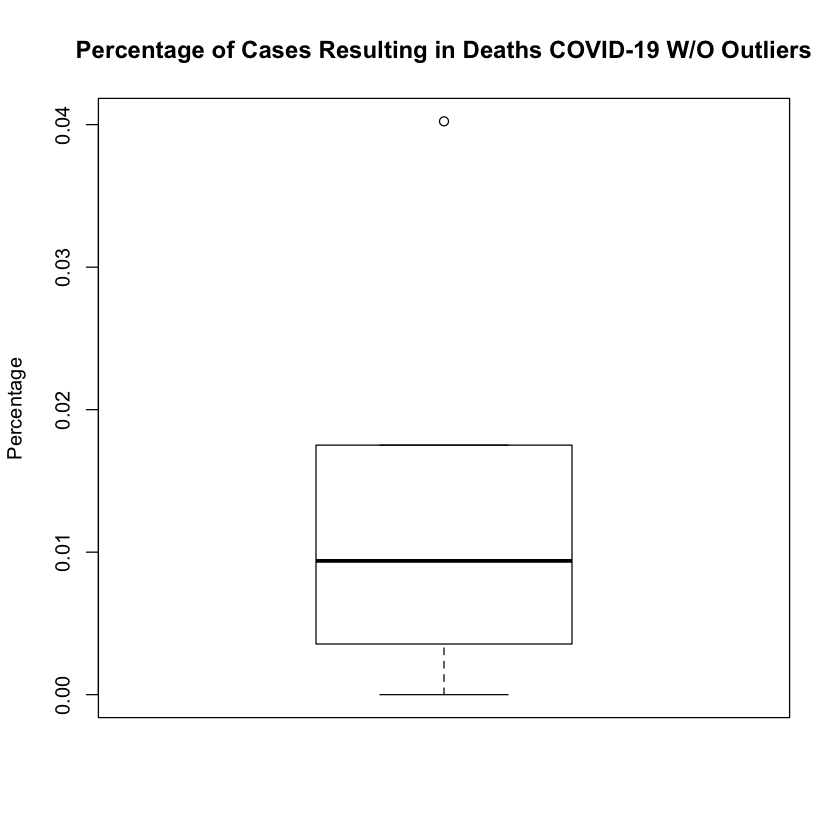

In [46]:
hist(td2020, xlab ='Percentage that Resulted in Deaths', main = "Percentage of Cases Resulting in Deaths COVID-19 W/O Outliers", breaks = 30)
skew <- skewness(td2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(td2020)
cat("Kurtosis: ", k)

favstats(td2020)
boxplot(td2020, ylab = "Percentage", main = "Percentage of Cases Resulting in Deaths COVID-19 W/O Outliers")

With the removal of Italy, the new distribution decreased in skewness. The tails of the distribution became lighter. There is a new outlier that appears. China is the outlier of this distribution.

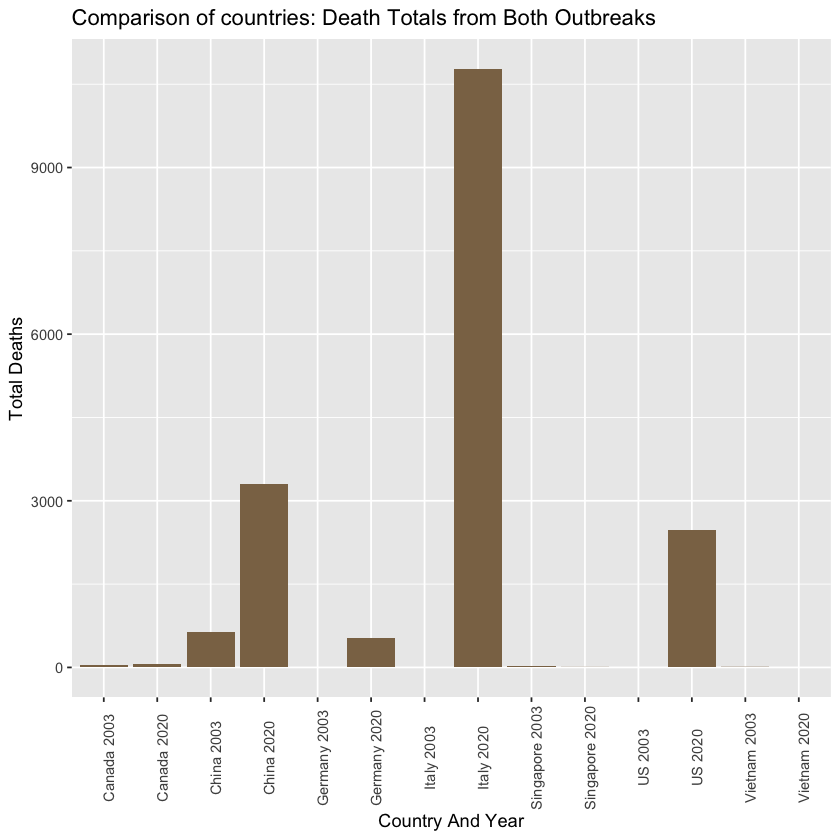

In [47]:
library(ggplot2)

data <- data.frame(CountryYear= c("Canada 2020", "Canada 2003", "Germany 2020", "Germany 2003", "Italy 2020", 
                                  "Italy 2003", "Singapore 2020", "Singapore 2003", "US 2020", "US 2003", 
                                  "Vietnam 2020", "Vietnam 2003", "China 2020", "China 2003"),  
                   Total=c(totDLD$Canada.2020, totDLD$Canada.2003, totDLD$Germany.2020, totDLD$Germany.2003,
                          totDLD$Italy.2020, totDLD$Italy.2003, totDLD$Singapore.2020, totDLD$Singapore.2003,
                          totDLD$US.2020, totDLD$US.2003, totDLD$Vietnam.2020, totDLD$Vietnam.2003,
                          totDLD$China.2020, totDLD$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill = 'burlywood4') + 
                    ggtitle("Comparison of countries: Death Totals from Both Outbreaks") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

The barchart shows that the number of cumulative deaths in each selected country is mostly larger for the COVID-19 outbreak. The exceptions to this claim are Singapore and Vietnam. The total number of deaths in China's SARS 2003 outbreak is slightly larger than Germany's COVID-19 death total.

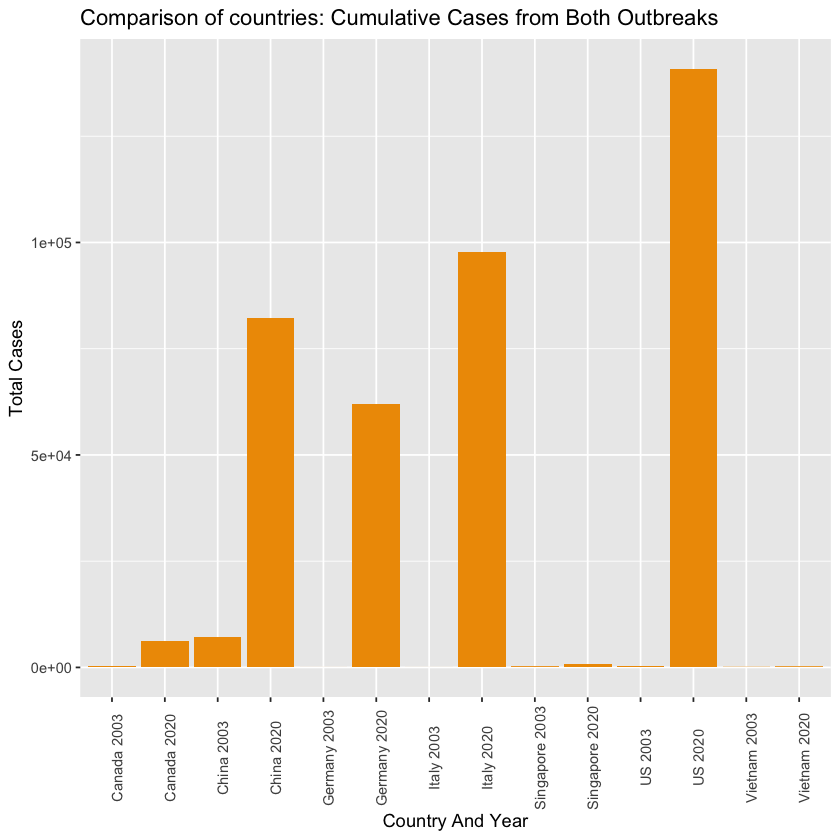

In [48]:
data <- data.frame(CountryYear= c("Canada 2020", "Canada 2003", "Germany 2020", "Germany 2003", "Italy 2020", 
                                  "Italy 2003", "Singapore 2020", "Singapore 2003", "US 2020", "US 2003", 
                                  "Vietnam 2020", "Vietnam 2003", "China 2020", "China 2003"),  
                   Total=c(cumulSC$Canada.2020, cumulSC$Canada.2003, cumulSC$Germany.2020, cumulSC$Germany.2003,
                          cumulSC$Italy.2020, cumulSC$Italy.2003, cumulSC$Singapore.2020, cumulSC$Singapore.2003,
                          cumulSC$US.2020, cumulSC$US.2003, cumulSC$Vietnam.2020, cumulSC$Vietnam.2003,
                          cumulSC$China.2020, cumulSC$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill = 'orange2') + 
                    ggtitle("Comparison of countries: Cumulative Cases from Both Outbreaks") + xlab("Country And Year") + ylab("Total Cases") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

The barchart shows that the number of cumulative cases in each selected country is mostly larger for the COVID-19 outbreak.  The total number of cumulative cases in China's SARS 2003 outbreak is slightly larger than Canada's COVID-19 number of cumulative cases on March 29, 2020.

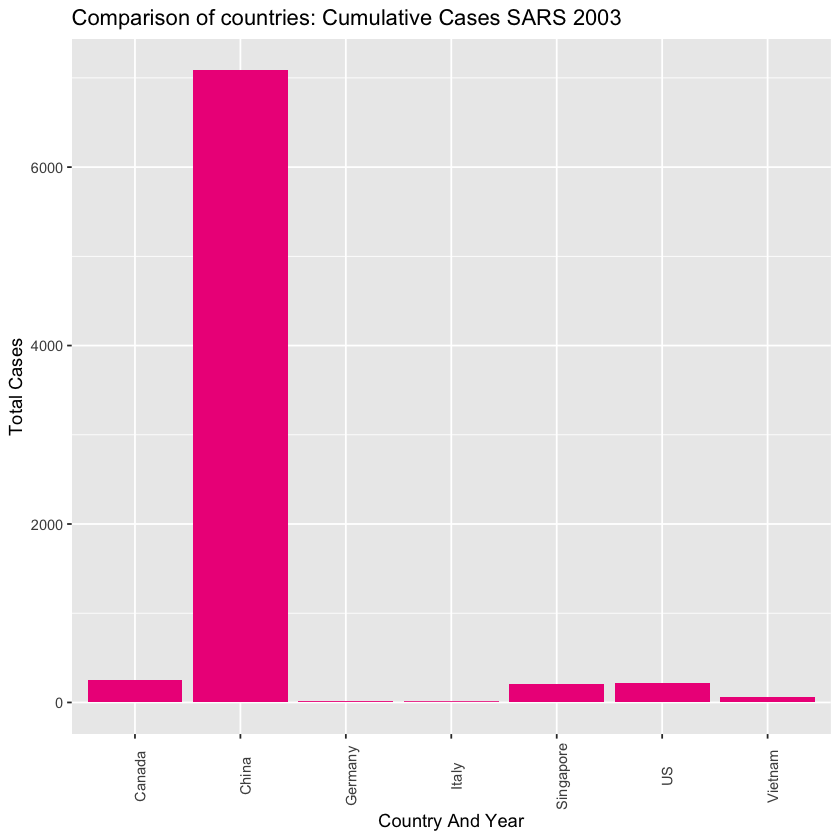

In [49]:
data <- data.frame(CountryYear= c("Canada", "Germany", "Italy", "Singapore", "US", "Vietnam", "China"),  
                   Total=c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003,
                        cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill = 'deeppink2') + 
                    ggtitle("Comparison of countries: Cumulative Cases SARS 2003") + xlab("Country And Year") + ylab("Total Cases") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

This barchart shows that China has the most cases out of the selected countries. The US, Singapore,and Canada seem to have a similar number of cumulative cases for the SARS outbreak. 

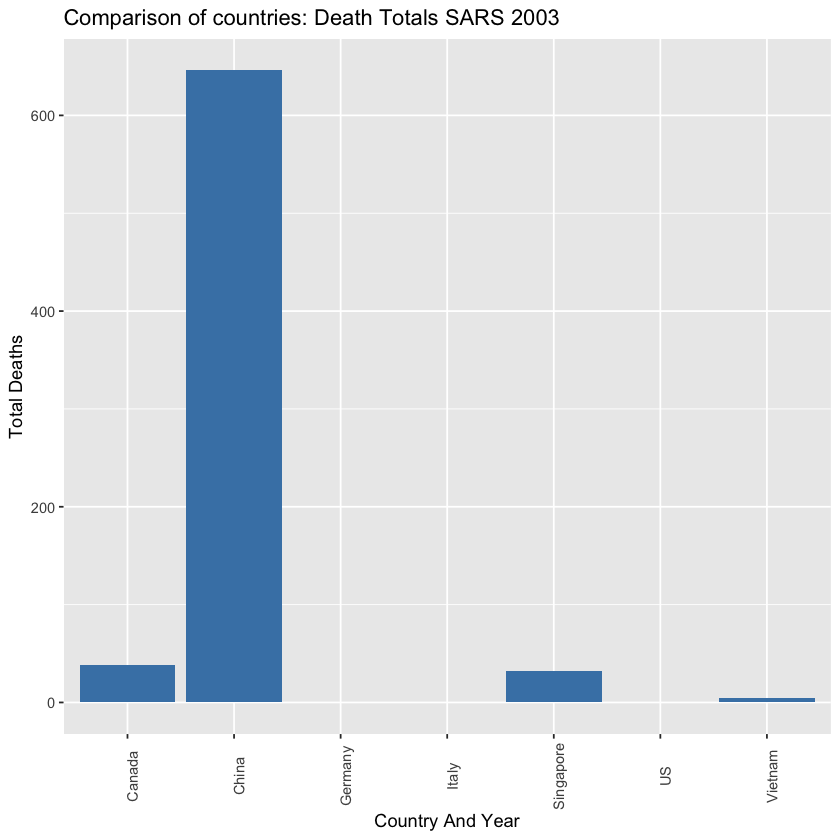

In [50]:
library(ggplot2)

data <- data.frame(CountryYear= c("Canada", "Germany", "Italy", "Singapore", "US", "Vietnam", "China"),  
                   Total=c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003,
                           totDLD$US.2003, totDLD$Vietnam.2003, totDLD$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill="steelblue") + 
                    ggtitle("Comparison of countries: Death Totals SARS 2003") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

This barchart shows that China had the highest number of deaths. Canada and Singapore had a similar number of deaths during the SARS outbreak. The United States, Germany, and Italy did not have a case that resulted in death.  

In [51]:
yC = read.csv("Comp20032020.csv")

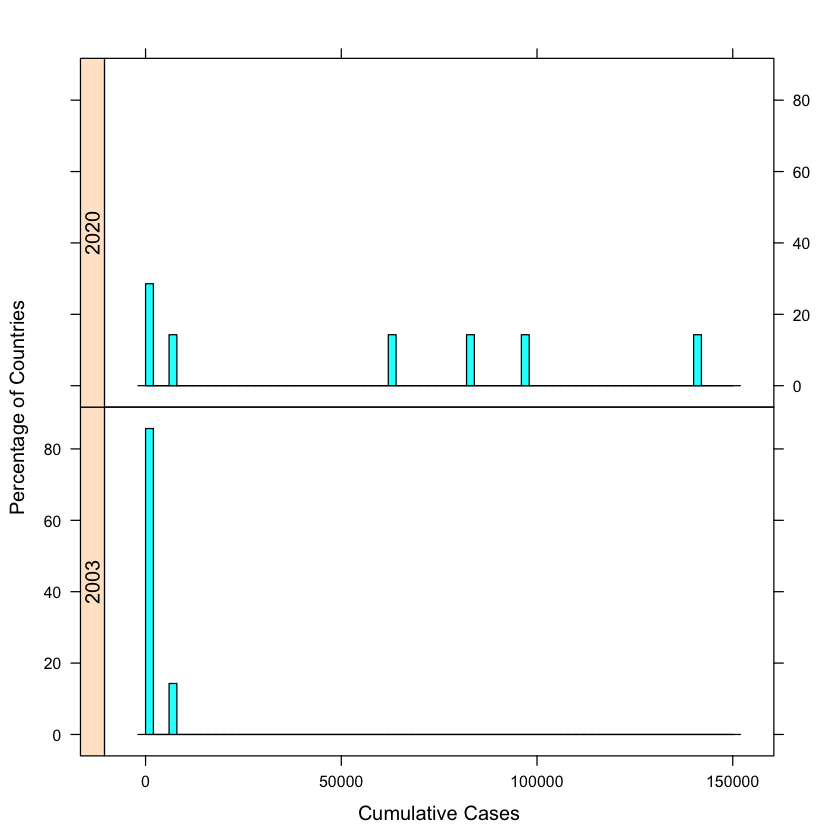

In [52]:
library(lattice)
histogram(~Cumulative.Cases|factor(Year),
         data = yC,
         layout = c(1,2),
         nint = 1,
         xlab = "Cumulative Cases",
         strip = FALSE,
         strip.left = TRUE,
         breaks=seq(from=0,to=150000,by=2000),
         ylab = "Percentage of Countries")

This stacked histogram shows the large difference between the different outbreaks. For the selected countries, the SARS outbreak in 2003 did not have a single country record over 50000 cumulative cases. More than half of the selected countries recorded over 50000 cumulative cases during the COVID-19 outbreak. 

In [54]:
library(pwr)
library(distr)

In [55]:
pwr.t.test(n = 96, d = 0.5, sig.level = 0.05, alternative = "greater")


     Two-sample t test power calculation 

              n = 96
              d = 0.5
      sig.level = 0.05
          power = 0.9646091
    alternative = greater

NOTE: n is number in *each* group


The t-tests comparing the average number of active cases per day, in selected countries, from the 2003 SARS Outbreak will have 96.4% power. 

In [56]:
pwr.t.test(d=0.5, sig.level = 0.05, power = 0.8, alternative = "greater")


     Two-sample t test power calculation 

              n = 50.1508
              d = 0.5
      sig.level = 0.05
          power = 0.8
    alternative = greater

NOTE: n is number in *each* group


50 days of SARS data needs to be collected in each country to have 0.8 power. 

This is the calculation of the active cases for each day during the SARS outbreak. The number of cumulative cases is subtracted by the number dead and by the number recovered to determine the number of active cases. 

In [57]:
dfSC <- dfSC %>%
            rename(CanadaC = Canada,
              GermanyC = Germany,
              ItalyC = Italy,
              SingaporeC = Singapore,
              UnitedStatesC = United.States,
              VietnamC = Vietnam,
              ChinaC = China, 
              DateC = Date)

dfSD <- dfSD %>%
            rename(CanadaD = Canada,
              GermanyD = Germany,
              ItalyD = Italy,
              SingaporeD = Singapore,
              UnitedStatesD = United.States,
              VietnamD = Vietnam,
              ChinaD = China,
              DateD = Date)

dfSR <- dfSR %>%
            rename(CanadaR = Canada,
              GermanyR = Germany,
              ItalyR = Italy,
              SingaporeR = Singapore,
              UnitedStatesR = United.States,
              VietnamR = Vietnam,
              ChinaR = China,
              DateR = Date)

dfSA <- cbind(dfSC, dfSD, dfSR)

dfSA <- dfSA %>%
    mutate(CanadaA = CanadaC - CanadaD - CanadaR)

dfSA <- dfSA %>%
    mutate(GermanyA = GermanyC - GermanyD - GermanyR)

dfSA <- dfSA %>%
    mutate(ItalyA = ItalyC - ItalyD - ItalyR)

dfSA <- dfSA %>%
    mutate(SingaporeA = SingaporeC - SingaporeD - SingaporeR)

dfSA <- dfSA %>%
    mutate(UnitedStatesA = UnitedStatesC - UnitedStatesD - UnitedStatesR)

dfSA <- dfSA %>%
    mutate(VietnamA = VietnamC - VietnamD - VietnamR)

dfSA <- dfSA %>%
    mutate(ChinaA = ChinaC - ChinaD - ChinaR)

Bonferroni Correction was used because multiple t-tests were performed. This correction decreases the probability of a type 1 error occuring. The p-value will be determined by the Bonferroni Correction. 

In [59]:
p_value = 0.05/6
cat("p_value: ", p_value)

p_value:  0.008333333

In [60]:
ttest = t.test(dfSA$UnitedStatesA, dfSA$ChinaA, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSA$UnitedStatesA and dfSA$ChinaA
t = -12.508, df = 95.124, p-value = 1
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -1625.406       Inf
sample estimates:
 mean of x  mean of y 
  51.67708 1486.53125 


Null hypothesis: There is no difference in the mean active SARS cases over the course of the outbreak between the two countries. 
Alternative hypothesis: This is a difference in the mean active SARS cases over the course of the outbreak between the two countries. 

We must fail to reject the null hypothesis for the t-test between China and United States. The p-value is above 0.0083. Additionally, the 95% confidence interval includes 0. Therefore, we can not conclude that the mean difference between the two groups is 0. 

China and America will be placed in the same category for the mean active SARS cases over the course of the outbreak. The category will be labeled 1 for the highest average of active SARS cases per day during the outbreak. 

In [61]:
ttest = t.test(dfSA$UnitedStatesA, dfSA$SingaporeA, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSA$UnitedStatesA and dfSA$SingaporeA
t = 4.3848, df = 189.47, p-value = 9.614e-06
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 11.62337      Inf
sample estimates:
mean of x mean of y 
 51.67708  33.02083 


Null hypothesis: There is no difference in the mean active SARS cases over the course of the outbreak between the two countries. Alternative hypothesis: This is a difference in the mean active SARS cases over the course of the outbreak between the two countries.

We must reject the null hypothesis. America has more mean acitve SARS cases over the course of the outbreak than Singapore. The p-value is extremely small and lower than 0.0083. Additionally, the 95% confidence interval does not include 0. 

Singapore will be placed in the second category. Since, the United States and China did not have a significant difference, we can assume that Singapore significantly differed from China. 

In [62]:
ttest = t.test(dfSA$SingaporeA, dfSA$CanadaA, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSA$SingaporeA and dfSA$CanadaA
t = -0.85444, df = 172.59, p-value = 0.803
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -9.540234       Inf
sample estimates:
mean of x mean of y 
 33.02083  36.27083 


Null hypothesis: There is no difference in the mean active SARS cases over the course of the outbreak between the two countries. Alternative hypothesis: This is a difference in the mean active SARS cases over the course of the outbreak between the two countries.

We must fail to reject the null hypothesis for this t-test. The p-value was much larger than 0.0083. Additionally, the 95% confidence interval included 0. Therefore, we can not conclude that the mean difference between the two groups is 0. 

Singapore and Canada will be placed in the second category. 

In [63]:
ttest = t.test(dfSA$CanadaA, dfSA$VietnamA, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSA$CanadaA and dfSA$VietnamA
t = 7.005, df = 189.91, p-value = 2.083e-11
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 17.00777      Inf
sample estimates:
mean of x mean of y 
 36.27083  14.01042 


Null hypothesis: There is no difference in the mean active SARS cases over the course of the outbreak between the two countries. Alternative hypothesis: This is a difference in the mean active SARS cases over the course of the outbreak between the two countries.

We must reject the null hypothesis. The p-value is extremely small and lower than 0.0083. Additionally, the 95% confidence interval does not include 0. Canada has more mean acitve SARS cases over the course of the outbreak than Vietnam.

Vietnam will be placed in the third category. 

In [64]:
ttest = t.test(dfSA$VietnamA, dfSA$GermanyA, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSA$VietnamA and dfSA$GermanyA
t = 5.5163, df = 95.903, p-value = 1.465e-07
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 8.780076      Inf
sample estimates:
mean of x mean of y 
14.010417  1.447917 


Null hypothesis: There is no difference in the mean active SARS cases over the course of the outbreak between the two countries. Alternative hypothesis: This is a difference in the mean active SARS cases over the course of the outbreak between the two countries.

We must reject the null hypothesis. The p-value is extremely small and lower than 0.0083. Additionally, the 95% confidence interval does not include 0. Vietnam has more mean acitve SARS cases over the course of the outbreak than Germany.

Germany will be placed in the fourth category. 

In [65]:
ttest = t.test(dfSA$GermanyA, dfSA$ItalyA, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSA$GermanyA and dfSA$ItalyA
t = 1.5855, df = 189.64, p-value = 0.05726
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.01462057         Inf
sample estimates:
mean of x mean of y 
 1.447917  1.104167 


Null hypothesis: There is no difference in the mean active SARS cases over the course of the outbreak between the two countries. Alternative hypothesis: This is a difference in the mean active SARS cases over the course of the outbreak between the two countries.

We must fail to reject the null hypothesis. The p-value is above 0.0083. Additionally, the 95% confidence interval includes 0. Therefore, we can not conclude that the mean difference between the two groups is 0. 

Germany and Italy will be placed in the fourth category. 

This table displays the categories for the mean active SARS cases over the course of the outbreak. Countries labelled 1 have the highest mean active SARS cases per day over the course of the outbreak. Countries labelled 4 have the smallest mean active SARS cases per day over the course of the outbreak. 

In [66]:
dfW_7$classification <- c(2,1,4,4,2,1,3)
dfW_7 <- data.frame(dfW_7$Member.State, dfW_7$classification)
dfW_7

dfW_7.Member.State,dfW_7.classification
<fct>,<dbl>
Canada,2
China,1
Germany,4
Italy,4
Singapore,2
United States of America,1
Vietnam,3


In [68]:
library(magrittr)

In [69]:
dfW_28 = read.csv("WHOselect28.csv", header = T)

Countries who have more than 0.000000175 (0.0000175%) of their population infected are considered high infection and are denoted with a 1 classification. Countries who have less than 0.000000175 (0.0000175%) of their population infected are considered low infection and are denoted with a 0 classification. 

In [70]:
t2003 <- c(cumulSC28$China, cumulSC28$Canada, cumulSC28$Germany, cumulSC28$Italy, cumulSC28$Singapore, 
           cumulSC28$US, cumulSC28$United.Kingdom, cumulSC28$Vietnam, cumulSC28$Spain, cumulSC28$Mongolia, 
           cumulSC28$Thailand, 
           cumulSC28$France, cumulSC28$India, cumulSC28$Romania, cumulSC28$South.Africa, cumulSC28$Colombia,
          cumulSC28$Finland, cumulSC28$Brazil, cumulSC28$Malaysia, cumulSC28$Kuwait, cumulSC28$Philippines,
          cumulSC28$Sweden, cumulSC28$Republic.of.Korea, cumulSC28$Indonesia, cumulSC28$Switzerland,
          cumulSC28$Russian.Federation, cumulSC28$Republic.of.Ireland, cumulSC28$New.Zealand)

pop <- c(1288000000, 31644028, 82534176, 57313203, 4114826, 290107933, 59647577, 82301656, 42187645, 2468762,
        64549866, 62244886, 1112000000, 21574326, 46719196, 41483869, 5213014, 181809246, 24698819, 2161626, 
        83051971, 8958229, 47892330, 220309469, 7339001, 144648257, 3996521, 4027200)

for (i in 1:length(pop)) {
    t2003[i] <- t2003[i]/pop[i]
}
t2003

for (i in 1:length(t2003)) {
    if (t2003[i] > 1.75*10**-7) {
        t2003[i] <- 1
    }
    else { 
        t2003[i] <- 0
    }
}
t2003

[1] 5.500000e-06 7.963588e-06 1.211619e-07 1.570319e-07 5.006287e-05
 [6] 7.583384e-07 1.005908e-07 7.654767e-07 2.370362e-08 3.645552e-06
[11] 1.394271e-07 1.124590e-07 2.697842e-09 1.390542e-07 2.140448e-08
[16] 2.410576e-08 1.918276e-07 1.650081e-08 3.239021e-07 4.626147e-07
[21] 1.685691e-07 3.348876e-07 6.264051e-08 9.078139e-09 9.538083e-07
[26] 6.913322e-09 5.004353e-07 2.483115e-07

[1] 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1

In [71]:
dfW_28$classification <- c(t2003)

In [72]:
dfW_28 %<>% mutate_if(is.integer,as.numeric)
dfW_28

Member.State,Total.population,Annual.Growth.Rate.....1992.2002,Dependency.ratio.1992,Dependency.ratio.2002,Percentage.of.population.aged.60...1992.,Percentage.of.population.aged.60.,Total.Fertility.Rate.1992,Total.Fertility.Rate.2002,LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002,⋯,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,classification
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Brazil,176257.327,1.4,63,51,6.8,8.1,2.6,2.2,68.9,⋯,34,29,40,246,235,257,136,128,145,1
Canada,31271.069,1.0,47,45,15.8,17.1,1.7,1.5,79.8,⋯,5,5,5,95,93,97,58,57,60,1
China,1302307.069,0.9,49,44,8.6,10.0,2.0,1.8,71.1,⋯,41,38,44,165,154,175,104,93,112,0
Colombia,43526.430,1.8,66,59,6.4,7.1,3.0,2.6,71.8,⋯,19,17,21,236,220,251,99,87,113,0
Finland,5197.451,0.3,49,49,18.7,20.3,1.8,1.7,78.2,⋯,3,3,3,135,131,140,60,56,64,1
France,59849.658,0.4,52,53,19.5,20.5,1.7,1.9,79.7,⋯,4,4,5,133,128,138,60,58,62,1
Germany,82414.408,0.2,46,48,20.5,24.0,1.3,1.3,78.7,⋯,4,4,4,118,114,123,60,59,62,0
India,1049549.474,1.8,68,62,6.9,7.7,3.8,3.1,61.0,⋯,95,86,106,291,268,314,220,197,243,1
Indonesia,217131.218,1.4,64,54,6.4,7.9,3.1,2.4,66.4,⋯,36,33,40,244,226,261,208,194,224,0


In [73]:
write.csv(dfW_28,"dfW28.csv", row.names = TRUE)

In [74]:
dfW28 = read.csv("dfW28.csv", header = T)

This dataframe displays the classifications for all of the countries in the SARS data set. 

In [75]:
fr <- dfW28
fr %<>% mutate_if(is.factor,as.character)

frame <- data.frame("Country: ", c(fr$Member.State), "Percent Class:", c(fr$classification))
frame

X.Country...,c.fr.Member.State.,X.Percent.Class..,c.fr.classification.
<fct>,<fct>,<fct>,<int>
Country:,Brazil,Percent Class:,1
Country:,Canada,Percent Class:,1
Country:,China,Percent Class:,0
Country:,Colombia,Percent Class:,0
Country:,Finland,Percent Class:,1
Country:,France,Percent Class:,1
Country:,Germany,Percent Class:,0
Country:,India,Percent Class:,1
Country:,Indonesia,Percent Class:,0


In [77]:
library(caret)
library(randomForest)
library(varImp)
library(naivebayes)

In [80]:
df <- dfW28

In [81]:
df$classification = as.factor(df$classification)
model_1 <- glm(classification ~ Total.population + Dependency.ratio.2002 + 
               Percentage.of.population.aged.60. + Total.Fertility.Rate.2002 +
               LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,
             family = "binomial", data = df) 
summary(model_1)


Call:
glm(formula = classification ~ Total.population + Dependency.ratio.2002 + 
    Percentage.of.population.aged.60. + Total.Fertility.Rate.2002 + 
    LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002 + PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + 
    PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002 + PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 + 
    PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002, family = "binomial", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4991  -0.9099  -0.2238   0.8181   2.1242  

Coefficients:
                                                   Estimate Std. Error z value
(Intercept)                                      -8.835e+01  5.471e+01  -1.615
Total.population                                  1.379e-06  3.675e-06   0.375
Dependency.ratio.2002                            -1.747e-01  1.554e-01  -1.124
Percentage.of.population.aged.60.                -5.658e-02  2.160e-01  -0.262
Total.Fertility.Rate.2002                 

The AIC score for the model including all of the variables is 49.806. 

In [82]:
df$classification = as.factor(df$classification)
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$classification
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(classification ~ Total.population + Dependency.ratio.2002 + 
               Percentage.of.population.aged.60. + Total.Fertility.Rate.2002 +
               LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,
               data = training, method = "glm",
               trControl = train.control)

print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Generalized Linear Model 

22 samples
 9 predictor
 2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 20, 20, 20, 20, 20, 20, ... 
Resampling results:

  Accuracy   Kappa
  0.2666667  -0.45



Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 3 1
         1 0 2
                                          
               Accuracy : 0.8333          
                 95% CI : (0.3588, 0.9958)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.1094          
                                          
                  Kappa : 0.6667          
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.6667          
         Pos Pred Value : 0.7500          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5000          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.6667          
      Balanced Accuracy : 0.8333          
                                          
       'Positive' Class : 0               
                                          

10 fold Cross Validation was performed on the model. The Accuracy of the model is 83.33%. The no information rate is 50%. The model is better than the no information rate. This means that the model has more accuracy than guessing the classification. The confidence interval is large. At the bounds of the interval, the model might be 36% accurate or 99% accurate. 

glm variable importance

                                                 Overall
PROBABILITY.OF.DYING.AGE.15.59.MALES.2002         100.00
LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002           89.22
Dependency.ratio.2002                              72.47
PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002     57.80
PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002        54.59
Total.population                                   48.27
Total.Fertility.Rate.2002                          28.61
PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002   23.37
Percentage.of.population.aged.60.                   0.00

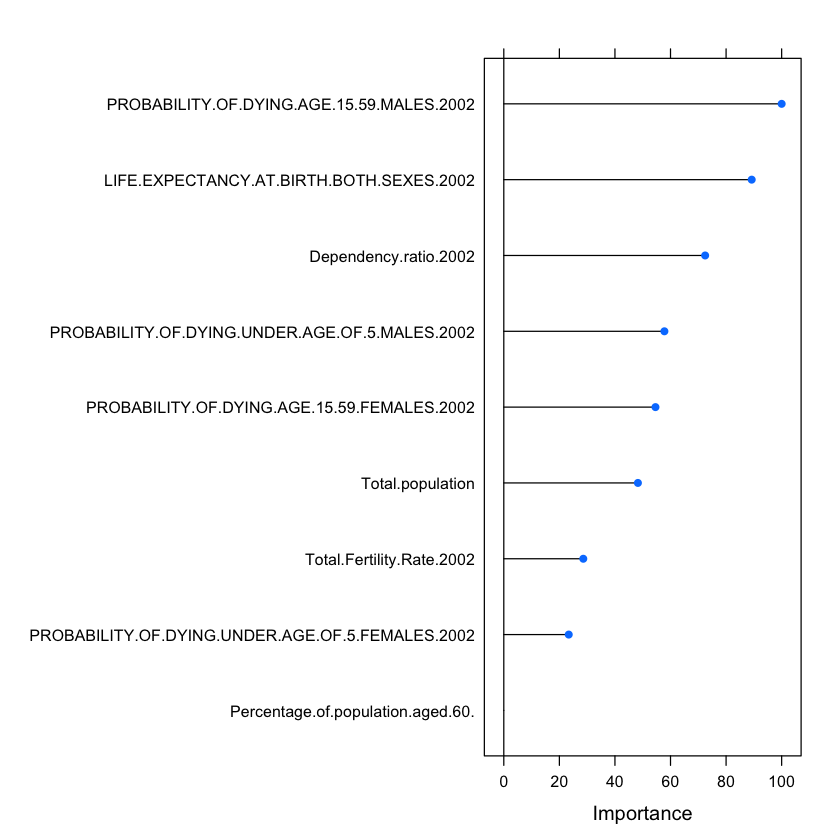

In [83]:
X <- caret::varImp(model)
plot(X)
X

There are six variables above 40 importance. Those variables will be chosen for the second model. 

In [84]:
model_2 <- glm(classification ~ PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 +
               LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002 + Dependency.ratio.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002 +
               Total.population,
               family = "binomial", data = df) 
summary(model_2)


Call:
glm(formula = classification ~ PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 + 
    LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002 + Dependency.ratio.2002 + 
    PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002 + 
    Total.population, family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4507  -1.0129  -0.2582   0.9227   1.8814  

Coefficients:
                                                 Estimate Std. Error z value
(Intercept)                                    -5.170e+01  4.099e+01  -1.261
PROBABILITY.OF.DYING.AGE.15.59.MALES.2002       3.480e-02  2.017e-02   1.725
LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002        6.965e-01  5.106e-01   1.364
Dependency.ratio.2002                          -1.367e-01  8.763e-02  -1.560
PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002  1.382e-01  9.090e-02   1.521
PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002    -2.306e-02  2.313e-02  -0.997
Total.population       

The AIC score slightly decreased from the first model to 45.09. 

In [85]:
df$classification = as.factor(df$classification)
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$classification
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(classification ~ PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 +
               LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002 + Dependency.ratio.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002 +
               Total.population,
               data = training, method = "glm",
               trControl = train.control)

print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Generalized Linear Model 

22 samples
 6 predictor
 2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 20, 20, 20, 20, 20, 20, ... 
Resampling results:

  Accuracy  Kappa
  0.35      -0.26



Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 3 1
         1 0 2
                                          
               Accuracy : 0.8333          
                 95% CI : (0.3588, 0.9958)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.1094          
                                          
                  Kappa : 0.6667          
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.6667          
         Pos Pred Value : 0.7500          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5000          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.6667          
      Balanced Accuracy : 0.8333          
                                          
       'Positive' Class : 0               
                                          

The second model provides the same accuracy as the first. Additionally, the 95% confidence interval is the same for the two models.  

glm variable importance

                                               Overall
PROBABILITY.OF.DYING.AGE.15.59.MALES.2002       100.00
PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002   82.44
Dependency.ratio.2002                            77.51
PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002      65.93
LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002         60.08
Total.population                                  0.00

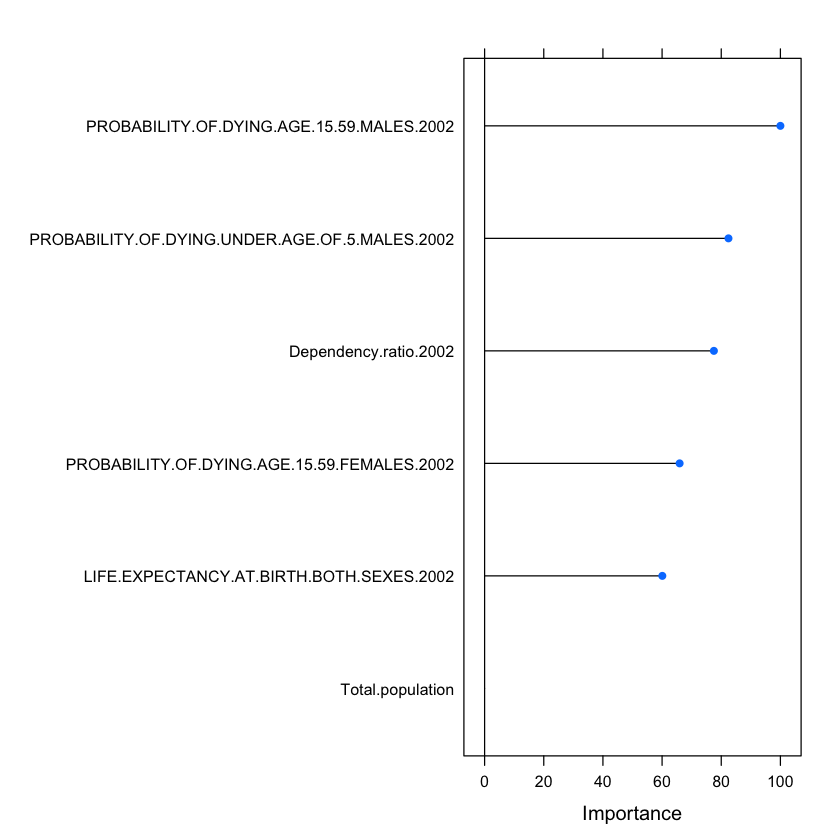

In [86]:
X <- caret::varImp(model)
plot(X)
X

There are five variables above 60 importance. Those variables will be chosen for the third model.

In [87]:
model_3 <- glm(classification ~ PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + Dependency.ratio.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002 + LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002,
               family = "binomial", data = df) 
summary(model_3)


Call:
glm(formula = classification ~ PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 + 
    PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + Dependency.ratio.2002 + 
    PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002 + LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002, 
    family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5050  -1.0772  -0.2572   0.8980   1.7905  

Coefficients:
                                                Estimate Std. Error z value
(Intercept)                                    -46.84264   38.35263  -1.221
PROBABILITY.OF.DYING.AGE.15.59.MALES.2002        0.03238    0.01856   1.744
PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002   0.13992    0.09035   1.549
Dependency.ratio.2002                           -0.13980    0.08598  -1.626
PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002     -0.02434    0.02312  -1.053
LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002         0.64140    0.48167   1.332
                                               Pr

The AIC score slightly decreased from the second model to 43.239.

In [88]:
df$classification = as.factor(df$classification)
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$classification
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(classification ~ PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + Dependency.ratio.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002 + LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002,
               data = training, method = "glm",
               trControl = train.control)

print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

Generalized Linear Model 

22 samples
 5 predictor
 2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 20, 20, 20, 20, 20, 20, ... 
Resampling results:

  Accuracy  Kappa
  0.4       -0.21



Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 3 2
         1 0 1
                                          
               Accuracy : 0.6667          
                 95% CI : (0.2228, 0.9567)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.3437          
                                          
                  Kappa : 0.3333          
                                          
 Mcnemar's Test P-Value : 0.4795          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.3333          
         Pos Pred Value : 0.6000          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5000          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.8333          
      Balanced Accuracy : 0.6667          
                                          
       'Positive' Class : 0               
                                          

This model provides a lower accuracy than the last two models. The accuracy of the model is still higher than the no information rate. The confidence interval is large. At the bounds of the interval, the model might be 22% accurate or 95% accurate.

glm variable importance

                                               Overall
PROBABILITY.OF.DYING.AGE.15.59.MALES.2002       100.00
Dependency.ratio.2002                            74.53
PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002   60.17
PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002      41.98
LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002          0.00

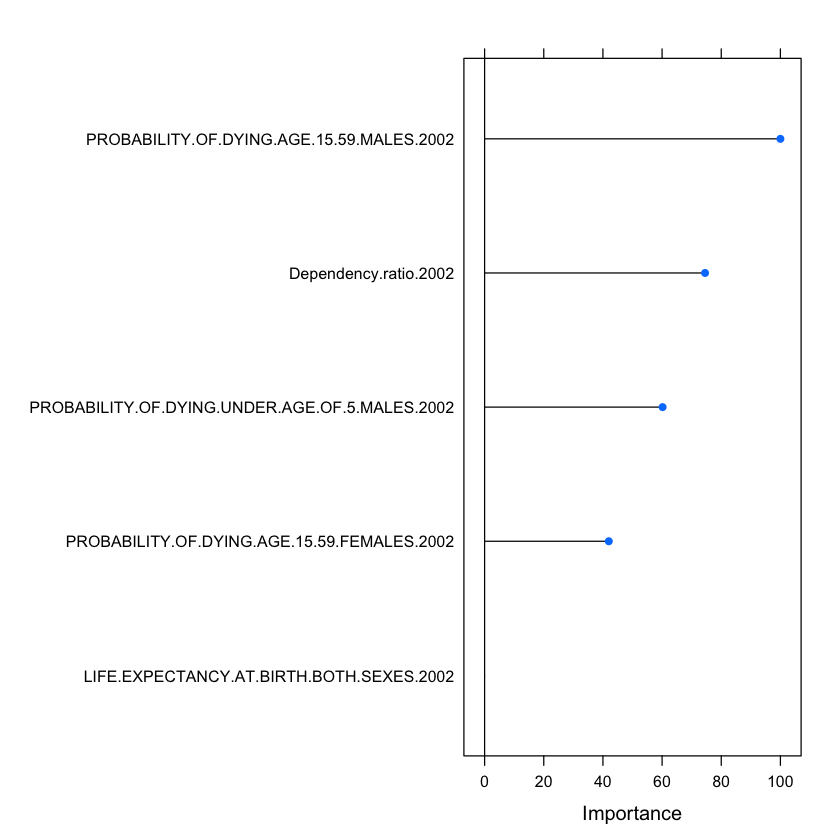

In [89]:
X <- caret::varImp(model)
plot(X)
X

There are four variables above 40 importance. Those variables will be chosen for the fourth model.

In [90]:
model_4 <- glm(classification ~ PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 + Dependency.ratio.2002 +
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,
               family = "binomial", data = df) 
summary(model_4)


Call:
glm(formula = classification ~ PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 + 
    Dependency.ratio.2002 + PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + 
    PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002, family = "binomial", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6451  -1.0563  -0.4027   1.0486   1.4754  

Coefficients:
                                               Estimate Std. Error z value
(Intercept)                                     4.72064    3.49270   1.352
PROBABILITY.OF.DYING.AGE.15.59.MALES.2002       0.01349    0.01144   1.179
Dependency.ratio.2002                          -0.10269    0.07082  -1.450
PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002  0.04394    0.04817   0.912
PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002    -0.02946    0.02513  -1.172
                                               Pr(>|z|)
(Intercept)                                       0.177
PROBABILITY.OF.DYING.AGE.15.59.MALES.2002         0.238
Depend

The fourth model has an AIC score that is slightly larger than the third model's AIC score. The fourth model has an AIC score that is slightly smaller than the second model's AIC score. 

In [91]:
df$classification = as.factor(df$classification)
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$classification
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(classification ~ PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 + Dependency.ratio.2002 +
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,
               data = training, method = "glm",
               trControl = train.control)

print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

Generalized Linear Model 

22 samples
 4 predictor
 2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 20, 20, 20, 20, 20, 20, ... 
Resampling results:

  Accuracy  Kappa
  0.4       -0.21



Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 3 3
         1 0 0
                                          
               Accuracy : 0.5             
                 95% CI : (0.1181, 0.8819)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.6562          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 1.0             
            Specificity : 0.0             
         Pos Pred Value : 0.5             
         Neg Pred Value : NaN             
             Prevalence : 0.5             
         Detection Rate : 0.5             
   Detection Prevalence : 1.0             
      Balanced Accuracy : 0.5             
                                          
       'Positive' Class : 0               
                                          

The fourth model has worse accuracy than the third model. The accuracy of the fourth model is equal to the no information rate. The confidence interval is large. At the bounds of the interval, the model might be 11% accurate or 88% accurate.

glm variable importance

                                               Overall
PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002     100.00
PROBABILITY.OF.DYING.AGE.15.59.MALES.2002        92.28
Dependency.ratio.2002                            57.97
PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002    0.00

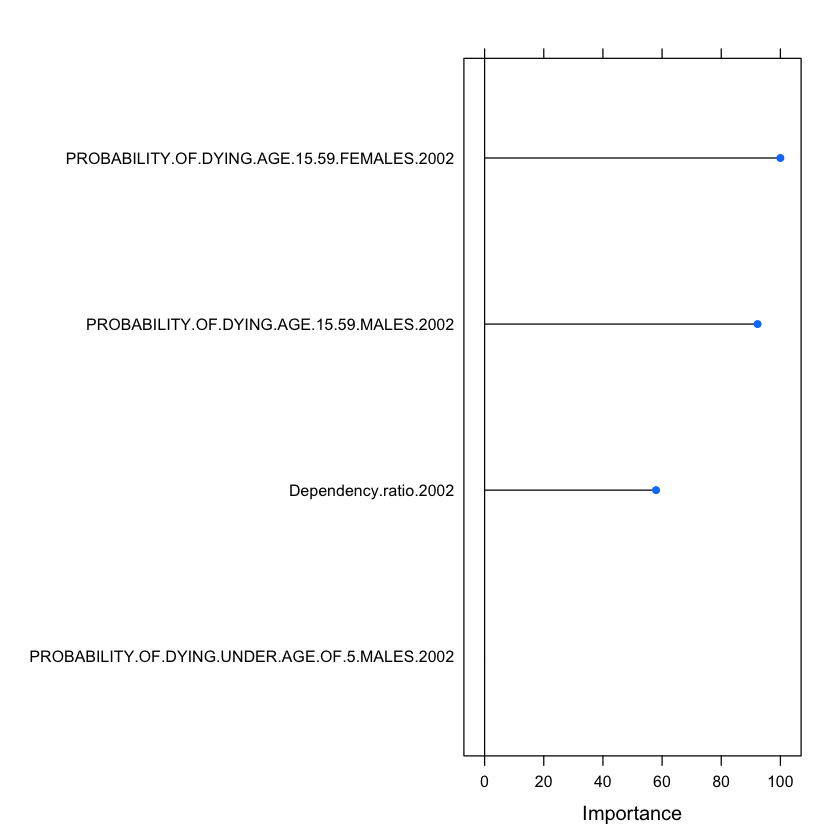

In [92]:
X <- caret::varImp(model)
plot(X)
X

There are four variables above 50 importance. Those variables will be chosen for the fifth model.

In [93]:
model_5 <- glm(classification ~ PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 + Dependency.ratio.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,
               family = "binomial", data = df) 
summary(model_5)


Call:
glm(formula = classification ~ PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 + 
    Dependency.ratio.2002 + PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002, 
    family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6236  -0.9479  -0.6508   1.1029   1.8596  

Coefficients:
                                            Estimate Std. Error z value
(Intercept)                                  3.40673    3.13446   1.087
PROBABILITY.OF.DYING.AGE.15.59.MALES.2002    0.01332    0.01193   1.117
Dependency.ratio.2002                       -0.08257    0.06636  -1.244
PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002 -0.01681    0.01528  -1.100
                                            Pr(>|z|)
(Intercept)                                    0.277
PROBABILITY.OF.DYING.AGE.15.59.MALES.2002      0.264
Dependency.ratio.2002                          0.213
PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002    0.271

(Dispersion parameter for binomial family taken to b

The AIC score for the fifth model has the smallest AIC score up to this point. 

In [94]:
df$classification = as.factor(df$classification)
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$classification
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(classification ~ PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 + Dependency.ratio.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,
               data = training, method = "glm",
               trControl = train.control)

print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

Generalized Linear Model 

22 samples
 3 predictor
 2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 20, 20, 20, 20, 20, 20, ... 
Resampling results:

  Accuracy  Kappa
  0.5       -0.01



Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 3 3
         1 0 0
                                          
               Accuracy : 0.5             
                 95% CI : (0.1181, 0.8819)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.6562          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 1.0             
            Specificity : 0.0             
         Pos Pred Value : 0.5             
         Neg Pred Value : NaN             
             Prevalence : 0.5             
         Detection Rate : 0.5             
   Detection Prevalence : 1.0             
      Balanced Accuracy : 0.5             
                                          
       'Positive' Class : 0               
                                          

The fifth model has the same accuracy as the fourth model. The accuracy of the fifth model is equal to the no information rate. The confidence interval is large. At the bounds of the interval, the model might be 11% accurate or 88% accurate.

glm variable importance

                                            Overall
PROBABILITY.OF.DYING.AGE.15.59.MALES.2002    100.00
PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002   77.25
Dependency.ratio.2002                          0.00

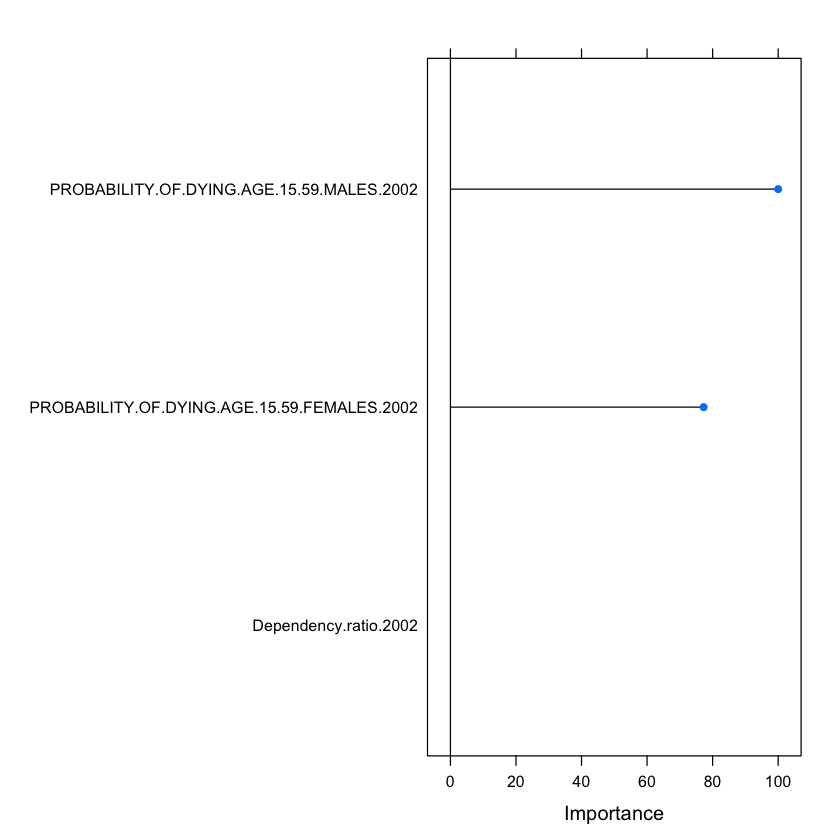

In [95]:
X <- caret::varImp(model)
plot(X)
X

There are four variables above 70 importance. Those variables will be chosen for the sixth model.

In [96]:
model_6 <- glm(classification ~ PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,
               family = "binomial", data = df) 
summary(model_6)


Call:
glm(formula = classification ~ PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 + 
    PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002, family = "binomial", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4643  -1.0536  -0.5592   1.1311   1.6252  

Coefficients:
                                            Estimate Std. Error z value
(Intercept)                                 -0.36549    0.85906  -0.425
PROBABILITY.OF.DYING.AGE.15.59.MALES.2002    0.01246    0.01005   1.239
PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002 -0.01941    0.01403  -1.383
                                            Pr(>|z|)
(Intercept)                                    0.671
PROBABILITY.OF.DYING.AGE.15.59.MALES.2002      0.215
PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002    0.167

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 38.673  on 27  degrees of freedom
Residual deviance: 36.050  on 25  degrees of freedom
AIC: 42.05

Number of Fisher Scoring 

The AIC score for the sixth model has the smallest AIC score up to this point.

In [97]:
df$classification = as.factor(df$classification)
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$classification
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(classification ~ PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,
               data = training, method = "glm",
               trControl = train.control)

print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

Generalized Linear Model 

22 samples
 2 predictor
 2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 20, 20, 20, 20, 20, 20, ... 
Resampling results:

  Accuracy   Kappa
  0.5166667  0    



Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 3 3
         1 0 0
                                          
               Accuracy : 0.5             
                 95% CI : (0.1181, 0.8819)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.6562          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 1.0             
            Specificity : 0.0             
         Pos Pred Value : 0.5             
         Neg Pred Value : NaN             
             Prevalence : 0.5             
         Detection Rate : 0.5             
   Detection Prevalence : 1.0             
      Balanced Accuracy : 0.5             
                                          
       'Positive' Class : 0               
                                          

The sixth model has the same accuracy as the fourth and fifth models. The accuracy of the sixth model is equal to the no information rate. The confidence interval is large. At the bounds of the interval, the model might be 11% accurate or 88% accurate.

glm variable importance

                                            Overall
PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002     100
PROBABILITY.OF.DYING.AGE.15.59.MALES.2002         0

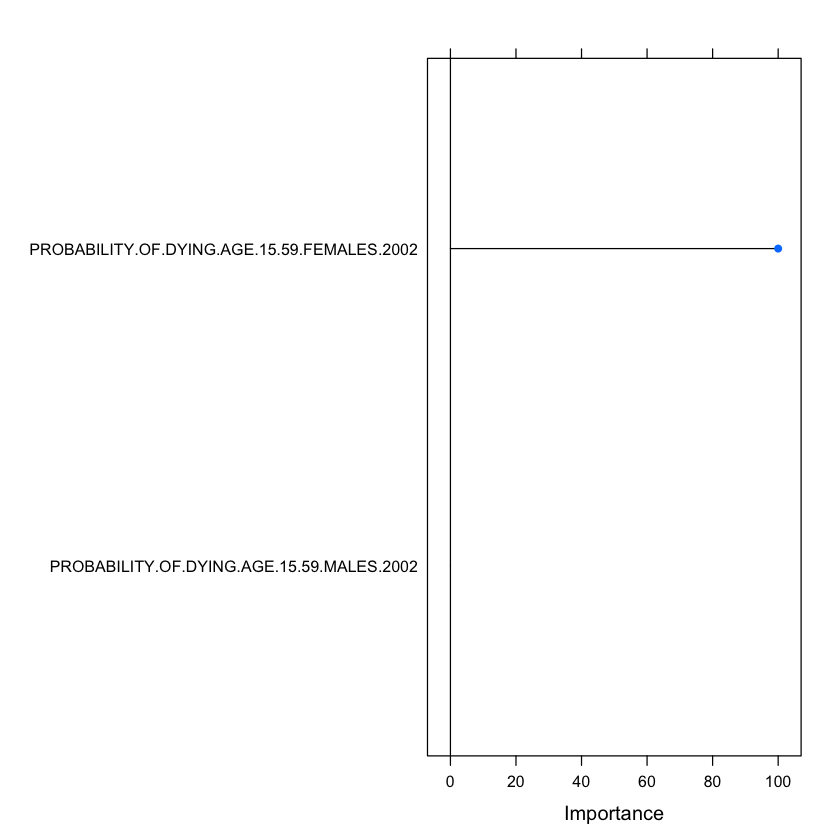

In [98]:
X <- caret::varImp(model)
plot(X)
X

There is one variable that is important. This variable will be chosen for the seventh model.

In [99]:
model_7 <- glm(classification ~ PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,
               family = "binomial", data = df) 
summary(model_7)


Call:
glm(formula = classification ~ PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002, 
    family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2093  -1.1460  -0.8039   1.1657   1.4104  

Coefficients:
                                             Estimate Std. Error z value
(Intercept)                                  0.248667   0.654589   0.380
PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002 -0.003552   0.004975  -0.714
                                            Pr(>|z|)
(Intercept)                                    0.704
PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002    0.475

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 38.673  on 27  degrees of freedom
Residual deviance: 38.090  on 26  degrees of freedom
AIC: 42.09

Number of Fisher Scoring iterations: 4


The AIC score for the seventh model is slightly larger than the AIC for the sixth model. 

In [100]:
df$classification = as.factor(df$classification)
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$classification
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(classification ~ PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,
               data = training, method = "glm",
               trControl = train.control)

print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

Generalized Linear Model 

22 samples
 1 predictor
 2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 20, 20, 20, 20, 20, 20, ... 
Resampling results:

  Accuracy   Kappa
  0.4666667  -0.05



Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 3 3
         1 0 0
                                          
               Accuracy : 0.5             
                 95% CI : (0.1181, 0.8819)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.6562          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 1.0             
            Specificity : 0.0             
         Pos Pred Value : 0.5             
         Neg Pred Value : NaN             
             Prevalence : 0.5             
         Detection Rate : 0.5             
   Detection Prevalence : 1.0             
      Balanced Accuracy : 0.5             
                                          
       'Positive' Class : 0               
                                          

The seventh model has the same accuracy as the fourth, fifth, and sixth models. The accuracy of the seventh model is equal to the no information rate. The confidence interval is large. At the bounds of the interval, the model might be 11% accurate or 88% accurate.

In [101]:
df$classification <- as.integer(df$classification)

In [103]:
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(df), 0.8*nrow(df))  # row indices for training data

xvars.train <- as.matrix(df[trainingRowIndex,3:29])
xvars.test <- as.matrix(df[-trainingRowIndex,3:29])

y.train <- as.matrix(df[trainingRowIndex, 30])
y.test <- as.matrix(df[-trainingRowIndex, 30])

In [104]:
library(glmnet)
fitlasso <- glmnet(xvars.train, y.train, family="binomial", alpha=1)
fitridge <- glmnet(xvars.train, y.train, family="binomial", alpha=0)
fitelnet <- glmnet(xvars.train, y.train, family="binomial", alpha=.5)

Loaded glmnet 3.0-2




In [105]:
for (i in 0:10) {
    assign(paste("fit", i, sep=""), cv.glmnet(xvars.train, y.train, type.measure="mse", 
                                              alpha=i/10,family="binomial"))
}

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message:
“Option grouped=FALSE enforced in

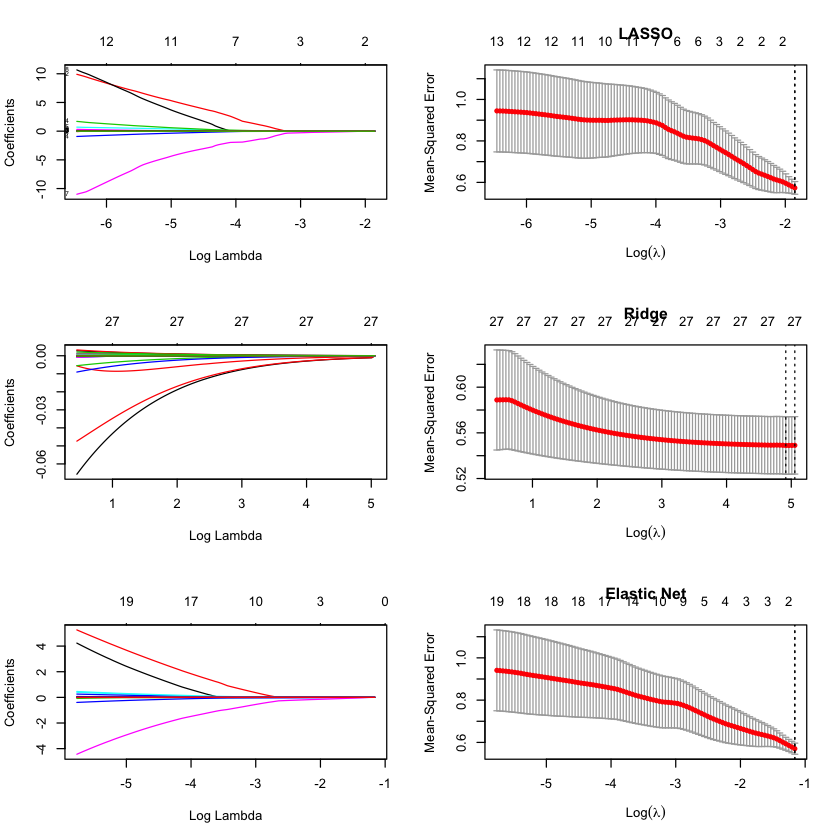

In [106]:
par(mfrow=c(3,2))

plot(fitlasso, xvar="lambda",label=TRUE)
plot(fit10, main="LASSO")

plot(fitridge, xvar="lambda")
plot(fit0, main="Ridge")

plot(fitelnet, xvar="lambda")
plot(fit5, main="Elastic Net")

There is a lot of variance in the results, no matter which log of lambda is chosen for all three regressions. For the Lasso and Elastic Net regressions, the variability decreases for certain log of lambda values. The decrease in variability begins at log lambda of -3 for the Lasso regression. The decrease in variability begins at log lambda of -2 for the Elastic Net regression. Most of the coefficient values are zero for all three regressions. The Lasso regression and the Elastic Net regression have three coefficient values that are not zero the entire time. For the elastic net regression, two coefficient values go to zero when log of lambda equals -3. Meanwhile, the other coefficient value goes to zero at log lambda of -4. For the Lasso regression, two coefficient values go to zero at log lambda of -3. The third coefficient value goes to zero at log lambda of 4. The Rigde regression has multiple coeffienct values that are slightly above zero. There are two coefficient values that are far from zero relatove to the other coefficient values. These two coefficients go to zero when the lgo lambda is 4. 

In [107]:
##Find best AIC/BIC for each model
##Ridge
tLL <- fitridge$nulldev - deviance(fitridge) ##Likelihood of the model
k <- fitridge$df ##Number of parameters
n <- fitridge$nobs ##Sample Size

##AIC

AICc <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m = min(AICc)
cat("Best AIC for Rigid: ", m, "\n")
best_AIC = match(c(min(AICc)),AICc)
print(paste("Lambda from AIC Ridge = ",fitridge$lambda[best_AIC]))

##BIC
BIC<-log(n)*k - tLL 
m = min(BIC)
cat("Best BIC for Rigid: ", m, "\n")
best_BIC = match(c(min(BIC)),BIC)
print(paste("Lambda from BIC Ridge = ",fitridge$lambda[best_BIC]))

##Lasso
##AIC
tLL <- fitlasso$nulldev - deviance(fitlasso)
k <- fitlasso$df
n <- fitlasso$nobs
AICc_lasso <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m = min(AICc_lasso)##Best AIC
cat("Best AIC for Lasso: ", m, "\n")
best_AIC_lasso = match(c(min(AICc_lasso)),AICc_lasso)##Which index is this?
print(paste("Lambda from AIC Lasso = ",fitlasso$lambda[best_AIC_lasso]))##Find this lambda

##BIC
BIC_lasso<-log(n)*k - tLL 
m = min(BIC_lasso)##Best BIC
cat("Best BIC for Lasso: ", m, "\n")
best_BIC_lasso = match(c(min(BIC_lasso)),BIC_lasso)##Which index is this?
print(paste("Lambda from BIC Lasso= ",fitlasso$lambda[best_BIC_lasso]))

##Elastic Net
##AIC
tLL <- fitelnet$nulldev - deviance(fitelnet)
k <- fitelnet$df
n <- fitelnet$nobs
AICc_elnet <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m= min(AICc_elnet)##Best AIC
cat("Best AIC for Elastic Net: ", m, "\n")
best_AIC_elnet = match(c(min(AICc_elnet)),AICc_elnet)##Which index is this?
print(paste("Lambda AIC enet =",fitelnet$lambda[best_AIC_elnet]))##Find this lambda

##BIC
BIC_elnet<-log(n)*k - tLL 
m= min(BIC_elnet)##Best BIC
cat("Best BIC for Elastic Net: ", m, "\n")
best_BIC_elnet = match(c(min(BIC_elnet)),BIC_elnet)##Which index is this?
print(paste("Lambda BIC enet= ",fitelnet$lambda[best_BIC_elnet]))

#Ridge AIC/BIC
yRidgeAIC <- predict(fit0, s=fitridge$lambda[best_AIC], newx=xvars.test)
mseRidgeAIC <- mean((y.test - yRidgeAIC)^2)
print(paste("mse Ridge AIC = ", mseRidgeAIC))
yRidgeBIC <- predict(fit0, s=fitridge$lambda[best_BIC], newx=xvars.test)
mseRidgeBIC <- mean((y.test - yRidgeBIC)^2)
print(paste("mse Ridge BIC = ", mseRidgeBIC))

#Lasso AIC/BIC
yLassoAIC <- predict(fit10, s=fitlasso$lambda[best_AIC_lasso], newx=xvars.test)
mseLassoAIC <- mean((y.test - yLassoAIC)^2)
print(paste("mse Lasso AIC = ", mseLassoAIC)) 
yLassoBIC <- predict(fit10, s=fitlasso$lambda[best_BIC_lasso], newx=xvars.test)
mseLassoBIC <- mean((y.test - yLassoBIC)^2)
print(paste("mse Lasso BIC = ", mseLassoBIC)) 

#Elastic Net AIC/BIC
yelnetAIC <- predict(fit5, s=fitelnet$lambda[best_AIC_elnet], newx=xvars.test)
mseelnetAIC <- mean((y.test - yelnetAIC)^2)
print(paste("mse elnet AIC = ",mseelnetAIC))

yelnetBIC <- predict(fit5, s=fitelnet$lambda[best_BIC_elnet], newx=xvars.test)
mseelnetBIC <- mean((y.test - yelnetBIC)^2)
print(paste("mse elnet BIC = ",mseelnetBIC))

Best AIC for Rigid:  -199.4666 
[1] "Lambda from AIC Ridge =  1.56802657822522"
Best BIC for Rigid:  81.99159 
[1] "Lambda from BIC Ridge =  1.56802657822522"
Best AIC for Lasso:  7.105427e-15 
[1] "Lambda from AIC Lasso =  0.15680265715001"
Best BIC for Lasso:  7.105427e-15 
[1] "Lambda from BIC Lasso=  0.15680265715001"
Best AIC for Elastic Net:  7.105427e-15 
[1] "Lambda AIC enet = 0.31360531430002"
Best BIC for Elastic Net:  7.105427e-15 
[1] "Lambda BIC enet=  0.31360531430002"
[1] "mse Ridge AIC =  3.06782804667833"
[1] "mse Ridge BIC =  3.06782804667833"
[1] "mse Lasso AIC =  3.08020582045363"
[1] "mse Lasso BIC =  3.08020582045363"
[1] "mse elnet AIC =  3.08020582045363"
[1] "mse elnet BIC =  3.08020582045363"


Rigid had the lowest AIC. It also had the lowest MSE. Therfore, it will be chosen as the best model. 

In [108]:
coef(fitlasso,s=fitridge$lambda[best_AIC])

28 x 1 sparse Matrix of class "dgCMatrix"
                                                                                                      1
(Intercept)                                                                                  -0.1823216
Total.population                                                                              .        
Annual.Growth.Rate.....1992.2002                                                              .        
Dependency.ratio.1992                                                                         .        
Dependency.ratio.2002                                                                         .        
Percentage.of.population.aged.60...1992.                                                      .        
Percentage.of.population.aged.60.                                                             .        
Total.Fertility.Rate.1992                                                                     .        
Total.Fertility.Rate.2

This result makes sense becuase the ridge plot showed that the coefficient values are near zero. 

In [109]:
suppressWarnings({acc <- array(numeric(),c(1,9))
for (i in 0:10) {
    
    set.seed(100+i)  # setting seed to reproduce results of random sampling
    trainingRowIndex <- sample(1:nrow(df), 0.75*nrow(df)) 
    
    lambda_seq <- 10^seq(1, -1, by = -.01)
    
    xvars.train <- as.matrix(df[trainingRowIndex,3:29])
    xvars.test <- as.matrix(df[-trainingRowIndex,3:29])

    y.train <- as.matrix(df[trainingRowIndex, 30])
    y.test <- as.matrix(df[-trainingRowIndex, 30])

    model <- cv.glmnet(xvars.train, y.train, 
            alpha = 0, lambda = lambda_seq)

    # finding the best lamda
    min_lamb <- model$lambda.min
    
    lasso <- glmnet(xvars.train, y.train, alpha = 0, lambda = min_lamb)
    pred <- predict(lasso, s = min_lamb, newx = xvars.test, type = "response")

    lasso_predict <- rep(0,nrow(xvars.test))
    lasso_predict[pred>=0.5] <- 1
    
    acc[i] <- mean(lasso_predict==y.test)
    
}})

In [110]:
accuracy <- sum(acc)/length(acc)
cat("10-fold Cross Validation for Rigid Regression: ", accuracy)

10-fold Cross Validation for Rigid Regression:  0.5857143

The rigid regression produced an accuracy that is less than the accuracy produced by model_1, model_2, and model_3. 

In [111]:
suppressWarnings({acc <- NULL
for(i in 1:nrow(df))
{   
    lambda_seq <- 10^seq(1, -1, by = -.01)
    
    xvars.train <- as.matrix(df[-i,3:29])
    xvars.test <- as.matrix(df[i,3:29])
    
    y.train <- as.matrix(df[-i, 30])
    y.test <- as.matrix(df[i, 30])
    
    model <- cv.glmnet(xvars.train, y.train, 
            alpha = 0, lambda = lambda_seq)

    # finding the best lamda
    min_lamb <- model$lambda.min
    
    lasso <- glmnet(xvars.train, y.train, alpha = 0, lambda = min_lamb)
    pred <- predict(lasso, s = min_lamb, newx = xvars.test, type = "response")

    lasso_predict <- rep(0,nrow(xvars.test))
    lasso_predict[pred>=0.5] <- 1
    
    acc[i] <- mean(lasso_predict==y.test)
} })

In [112]:
accuracy <- sum(acc)/length(acc)
cat("Leave One Out Cross Validation for Rigid Regression: ", accuracy)

Leave One Out Cross Validation for Rigid Regression:  0.5357143

The Leave One Out Cross Validation determined that the Rigid Regression was correct 53.5% of the time. This accuracy is worse than the accuracy determined by the 10-fold cross validation. 

It is safe to say that the Rigid Regression is not better than the first three generalized linear models created above. 

In [113]:
dfSC = read.csv("CumulativeCases.csv", header = T)

In [116]:
class(dfSC$Date)
dfSC$Date <- as.character(dfSC$Date)
dfSC$Date <- as.POSIXct(dfSC$Date)

[1] "POSIXct" "POSIXt"

`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


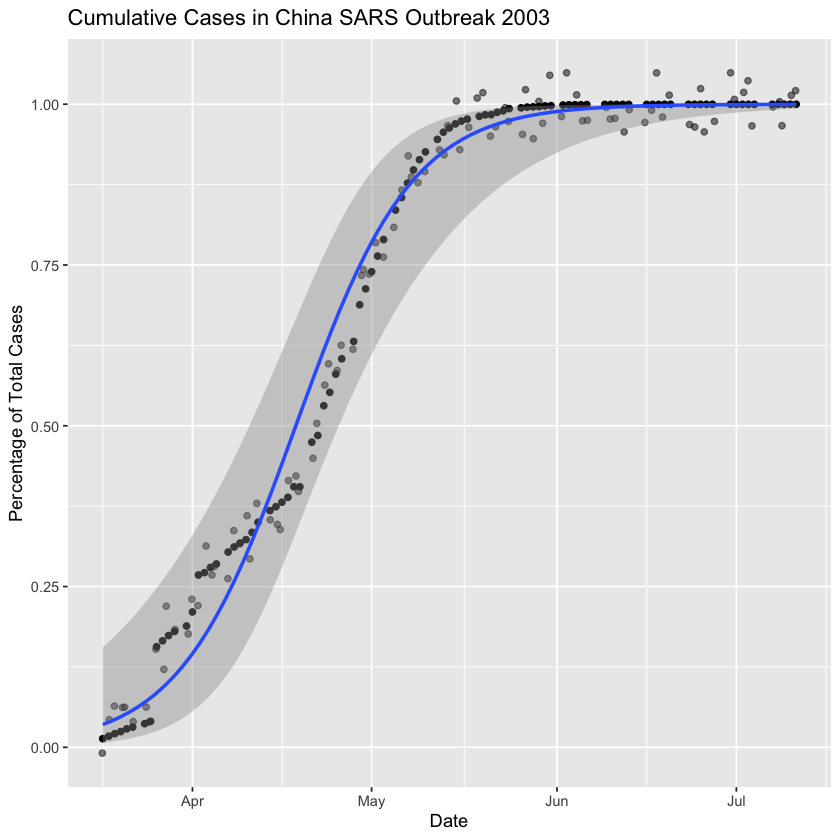

In [117]:
log_plot <- ggplot(data = dfSC, aes(x = Date, y = China/7084)) + 
geom_jitter(alpha = 0.5, height = 0.05) +  geom_point() + 
            stat_smooth(method = "glm", method.args = list(family = "binomial"), se = TRUE) + 
            ylab("Percentage of Total Cases")
log_plot + ggtitle("Cumulative Cases in China SARS Outbreak 2003")


In [118]:
log_reg <- glm(China/7084 ~ seq(1,96,1), data = dfSC, family = binomial)

log_reg

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Call:  glm(formula = China/7084 ~ seq(1, 96, 1), family = binomial, 
    data = dfSC)

Coefficients:
  (Intercept)  seq(1, 96, 1)  
      -3.4763         0.1197  

Degrees of Freedom: 95 Total (i.e. Null);  94 Residual
Null Deviance:	    66.84 
Residual Deviance: 1.522 	AIC: 32.36

AIC has a value of 32.36. 

In [119]:
library(stats)

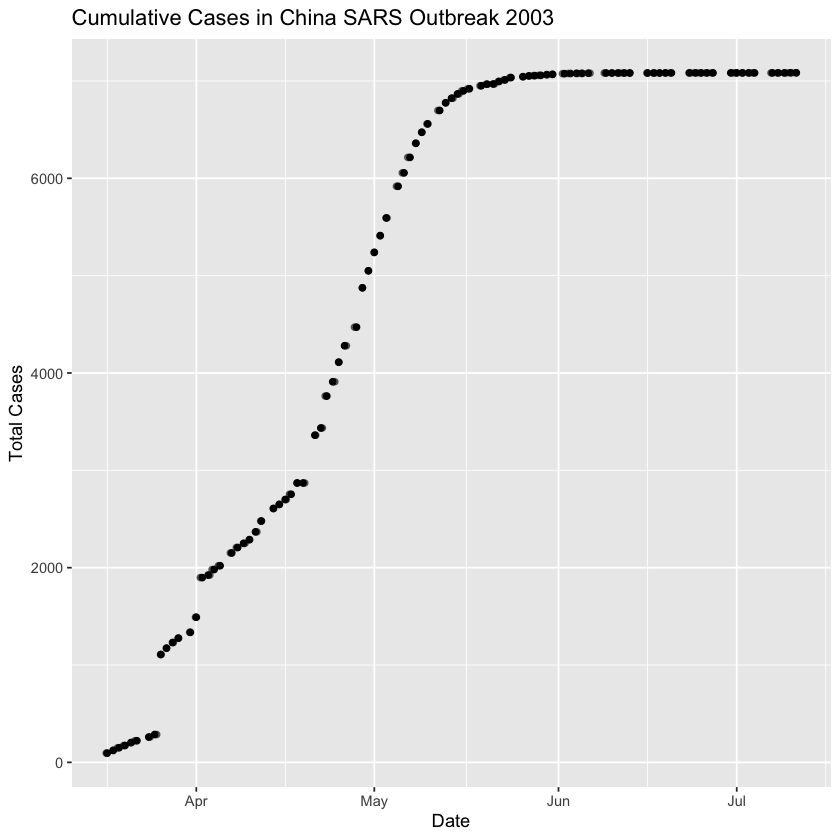

In [120]:
log_plot <- ggplot(data = dfSC, aes(x = Date, y = China)) + 
geom_jitter(alpha = 0.5, height = 0.05) +  geom_point() + 
            ylab("Total Cases")
log_plot + ggtitle("Cumulative Cases in China SARS Outbreak 2003")

In [121]:
#find the parameters for the equation
times <- seq(1,96,1)
SS<-getInitial(dfSC$China~SSlogis(times,alpha,xmid,scale),data=data.frame(dfSC$China==dfSC$China,times=times))
SS

alpha        xmid       scale 
7234.622282   30.381557    9.725367

In [122]:
K_0<-SS["alpha"]
R_0<-1/SS["scale"]
N0<-SS["alpha"]/(exp(SS["xmid"]/SS["scale"])+1)
y <- dfSC$China

m<-nls(y~K*N0*exp(R*times)/(K+N0*(exp(R*times)-1)),start=list(K=K_0,R=R_0,N0=N0))
#estimated parameters
summary(m)

c <- cor(y,predict(m))
cat("correlation coefficient: ", c, "\n")

AIC <- AIC(m)
cat("AIC: ", AIC)


Formula: y ~ K * N0 * exp(R * times)/(K + N0 * (exp(R * times) - 1))

Parameters:
          Estimate Std. Error t value Pr(>|t|)    
K.alpha  7.235e+03  4.944e+01  146.34   <2e-16 ***
R.scale  1.028e-01  3.240e-03   31.73   <2e-16 ***
N0.alpha 3.048e+02  2.847e+01   10.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 273.3 on 93 degrees of freedom

Number of iterations to convergence: 0 
Achieved convergence tolerance: 1.42e-06


correlation coefficient:  0.9942102 
AIC:  1354.648

The generalized linear model produces a better model. The AIC score is much lower for the generalized linear model than the non-linear least squares model. 

integer(0)

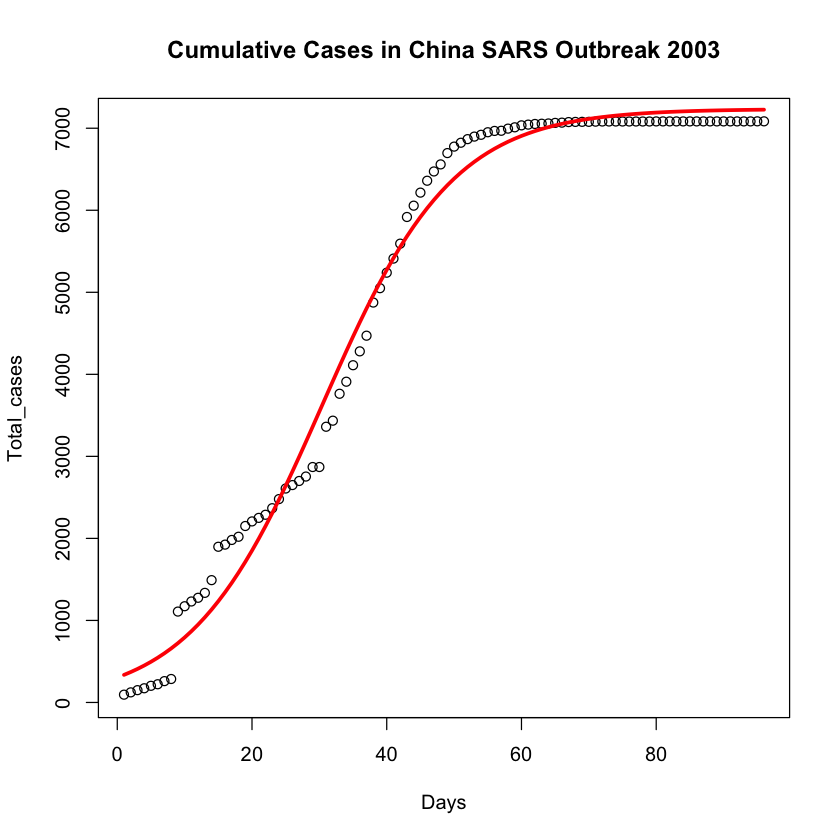

In [123]:
Days = times
Total_cases = dfSC$China

plot(Days, Total_cases) + lines(times,predict(m),col="red", lty=1,lwd=3)
title(main = "Cumulative Cases in China SARS Outbreak 2003")

The plot above is the non linear least squares model overlayed on the data. 

In [125]:
dfFDSR <- read.csv("FinalDayTR.csv", header = T)
dfFDCR <- read.csv("FinDayCoronaR.csv", header = T)
dfFDSD <- read.csv("FinalDayTD.csv", header = T)
dfFDCD <- read.csv("FinDayCoronaD.csv", header = T)

In [126]:
compC <- data.frame("Country/Year" = c("China 2003", "China 2020"), "Recovered" = c(dfFDSR$China, dfFDCR$China),
                  "Deaths" = c(dfFDSD$China, dfFDCD$China))
compC

Country.Year,Recovered,Deaths
<fct>,<int>,<int>
China 2003,6375,646
China 2020,75582,3304


In [127]:
p1_r2003 = 6375/(6375+646)
p2_r2020 = 75582/(75582+3304)

RR1 = p1_r2003/p2_r2020
RR1

[1] 0.9476823

In [128]:
c_upper1 = exp(log(RR1) + 1.96*(sqrt((646/(6375*(6375+646)) + (3304/(75582*(75582+3304)))))))
c_lower1 = exp(log(RR1) - 1.96*(sqrt((646/(6375*(6375+646)) + (3304/(75582*(75582+3304)))))))

cat("upper RR1: ", c_upper1, " \n")
cat("lower RR1: ", c_lower1)

upper RR1:  0.9549004  
lower RR1:  0.9405187

In [129]:
q1_r2003 = 1 - p1_r2003
q2_r2020 = 1 - p2_r2020
OR1 = (p1_r2003*q2_r2020) / (p2_r2020*q1_r2003)
OR1

[1] 0.4313893

In [130]:
cor_upper1 = exp(log(OR1) + 1.96*(sqrt((1/6375)+(1/646)+(1/75582)+(1/3304))))
cor_lower1 = exp(log(OR1) - 1.96*(sqrt((1/6375)+(1/646)+(1/75582)+(1/3304))))

cat("upper OR1: ", cor_upper1, " \n")
cat("lower OR1: ", cor_lower1)

upper OR1:  0.4711225  
lower OR1:  0.395007

The risk ratio for China was below 1. This meant that if a person is infected with the SARS virus in 2003, they would have around 5% less chance of surviving than if they are infected with COVID-19 in 2020. The odds of being infected with SARS in 2003 and recovering are lower than having COVID-19 in 2020 and recovering in China. The confidence interval for the risk ratio and odds ratio is not very large. 

In [131]:
compUS <- data.frame("Country/Year" = c("US 2003", "US 2020"), "Recovered" = c(dfFDSR$United.States, dfFDCR$US),
                  "Deaths" = c(dfFDSD$United.States, dfFDCD$US))
compUS

Country.Year,Recovered,Deaths
<fct>,<int>,<int>
US 2003,67,0
US 2020,2665,2467


In [132]:
p1_r2003 = 67/(67+0.5)  #Haldane Correction
p2_r2020 = 2665/(2665+2467)

RR1 = p1_r2003/p2_r2020
RR1

[1] 1.911439

In [133]:
c_upper1 = exp(log(RR1) + 1.96*(sqrt((0/(67*(67+0)) + (2467/(2665*(2665+2467)))))))
c_lower1 = exp(log(RR1) - 1.96*(sqrt((0/(67*(67+0)) + (2467/(2665*(2665+2467)))))))

cat("upper RR1: ", c_upper1, " \n")
cat("lower RR1: ", c_lower1)

upper RR1:  1.962424  
lower RR1:  1.861779

In [134]:
q1_r2003 = 1 - p1_r2003 
q2_r2020 = 1 - p2_r2020
OR1 = (p1_r2003*q2_r2020) / (p2_r2020*q1_r2003)
OR1

[1] 124.0443

In [135]:
cor_upper1 = exp(log(OR1) + 1.96*(sqrt((1/67)+(1/0.5)+(1/2665)+(1/2467)))) #Haldane Correction
cor_lower1 = exp(log(OR1) - 1.96*(sqrt((1/67)+(1/0.5)+(1/2665)+(1/2467)))) #Haldane Correction

cat("upper OR1: ", cor_upper1, " \n")
cat("lower OR1: ", cor_lower1)

upper OR1:  2004.92  
lower OR1:  7.674611

The risk ratio for the United States is above 1. The risk ratio value was above 1.9. This means that a person infected with SARS in 2003 is almost twice as likely to recover than if they were infected with COVID-19 in 2020. The odds of being infected with SARS in 2003 and recovering are higher than having COVID-19 in 2020 and recovering, in the United States. The 95% confidence is not large for the risk ratio. On the other hand, the odds ratio has a large 95% confidence interval. This is due to the fact that there is a Haldane correction. This correction was necessary because the number of deaths in America was 0 during SARS outbreak. 

In [136]:
compIt <- data.frame("Country/Year" = c("Italy 2003", "Italy 2020"), "Recovered" = c(dfFDSR$Italy, dfFDCR$Italy),
                  "Deaths" = c(dfFDSD$Italy, dfFDCD$Italy))
compIt

Country.Year,Recovered,Deaths
<fct>,<int>,<int>
Italy 2003,9,0
Italy 2020,13030,10779


In [137]:
p1_r2003 = 9/(9+0.5)   #Haldane Correction
p2_r2020 = 13030/(13030+10779)

RR1 = p1_r2003/p2_r2020
RR1

[1] 1.731074

In [138]:
c_upper1 = exp(log(RR1) + 1.96*(sqrt((0+0.5/(9*(9+0.5)) + (10779/(13030*(13030+10779))))))) #Haldane Correction
c_lower1 = exp(log(RR1) - 1.96*(sqrt((0+0.5/(9*(9+0.5)) + (10779/(13030*(13030+10779))))))) #Haldane Correction

cat("upper RR1: ", c_upper1, " \n")
cat("lower RR1: ", c_lower1)

upper RR1:  2.011884  
lower RR1:  1.489458

In [139]:
q1_r2003 = 1 - p1_r2003
q2_r2020 = 1 - p2_r2020
OR1 = (p1_r2003*q2_r2020) / (p2_r2020*q1_r2003)
OR1

[1] 14.89041

In [140]:
cor_upper1 = exp(log(OR1) + 1.96*(sqrt((1/9)+(1/0.5)+(1/13030)+(1/10779))))
cor_lower1 = exp(log(OR1) - 1.96*(sqrt((1/9)+(1/0.5)+(1/13030)+(1/10779))))
cat("upper OR1: ", cor_upper1, " \n")
cat("lower OR1: ", cor_lower1)

upper OR1:  256.8894  
lower OR1:  0.8631117

The risk ratio for Italy is above 1. The risk ratio value was 1.731. This means that a person infected with SARS in 2003 is almost twice as likely to recover than if they were infected with COVID-19 in 2020. The odds of being infected with SARS in 2003 and recovering are higher than having COVID-19 in 2020 and recovering, in Italy. The 95% confidence is not large for the risk ratio. On the other hand, the odds ratio has a large 95% confidence interval. This is due to the fact that there is a Haldane correction. This correction was necessary because the number of deaths in Italy was 0 during SARS outbreak.

In [141]:
compG <- data.frame("Country/Year" = c("Germany 2003", "Germany 2020"), "Recovered" = c(dfFDSR$Germany, dfFDCR$Germany),
                  "Deaths" = c(dfFDSD$Germany, dfFDCD$Germany))
compG

Country.Year,Recovered,Deaths
<fct>,<int>,<int>
Germany 2003,9,0
Germany 2020,9211,533


In [142]:
p1_r2003 = 9/(9+0.5) #Haldane Correction
p2_r2020 = 9211/(9211+533)

RR1 = p1_r2003/p2_r2020
RR1

[1] 1.002188

In [143]:
c_upper1 = exp(log(RR1) + 1.96*(sqrt((0.5/(9*(9+0.5)) + (533/(9211*(9211+533)))))))
c_lower1 = exp(log(RR1) - 1.96*(sqrt((0.5/(9*(9+0.5)) + (533/(9211*(9211+533)))))))

cat("upper RR1: ", c_upper1, " \n")
cat("lower RR1: ", c_lower1)

upper RR1:  1.164331  
lower RR1:  0.8626252

In [144]:
q1_r2003 = 1 - p1_r2003
q2_r2020 = 1 - p2_r2020
OR1 = (p1_r2003*q2_r2020) / (p2_r2020*q1_r2003)
OR1

[1] 1.041581

In [145]:
cor_upper1 = exp(log(OR1) + 1.96*(sqrt((1/9)+(1/0.5)+(1/9211)+(1/533))))
cor_lower1 = exp(log(OR1) - 1.96*(sqrt((1/9)+(1/0.5)+(1/9211)+(1/533))))

cat("upper OR1: ", cor_upper1, " \n")
cat("lower OR1: ", cor_lower1)

upper OR1:  17.99136  
lower OR1:  0.06030062

The risk ratio for Germany was close to 1. This meant that there was no increased risk of dying if infected by either outbreak in Germany. The odds of being infected with SARS in 2003 and recovering are the same as having COVID-19 in 2020 and recovering, in Germany. The 95% confidence is not large for the risk ratio. On the other hand, the odds ratio has a large 95% confidence interval. This is due to the fact that there is a Haldane correction. This correction was necessary because the number of deaths in Germany was 0 during SARS outbreak.

In [146]:
compS <- data.frame("Country/Year" = c("Singapore 2003", "Singapore 2020"), "Recovered" = c(dfFDSR$Singapore, dfFDCR$Singapore),
                  "Deaths" = c(dfFDSD$Singapore, dfFDCD$Singapore))
compS

Country.Year,Recovered,Deaths
<fct>,<int>,<int>
Singapore 2003,172,32
Singapore 2020,212,3


In [147]:
p1_r2003 = 172/(172+32)
p2_r2020 = 212/(212+3)

RR1 = p1_r2003/p2_r2020
RR1

[1] 0.8550684

In [148]:
c_upper1 = exp(log(RR1) + 1.96*(sqrt((32/(172*(172+32)) + (3/(212*(212+3)))))))
c_lower1 = exp(log(RR1) - 1.96*(sqrt((32/(172*(172+32)) + (3/(212*(212+3)))))))

cat("upper RR1: ", c_upper1, " \n")
cat("lower RR1: ", c_lower1)

upper RR1:  0.9091141  
lower RR1:  0.8042357

In [149]:
q1_r2003 = 1 - p1_r2003
q2_r2020 = 1 - p2_r2020
OR1 = (p1_r2003*q2_r2020) / (p2_r2020*q1_r2003)
OR1

[1] 0.07606132

In [150]:
cor_upper1 = exp(log(OR1) + 1.96*(sqrt((1/172)+(1/32)+(1/212)+(1/3))))
cor_lower1 = exp(log(OR1) - 1.96*(sqrt((1/172)+(1/32)+(1/212)+(1/3))))

cat("upper OR1: ", cor_upper1, " \n")
cat("lower OR1: ", cor_lower1)

upper OR1:  0.2526418  
lower OR1:  0.02289932

The risk ratio for Singapore was below 1. This meant that if a person is infected with the SARS virus in 2003, they would have around 15% less chance of surviving than if they are infected with COVID-19 in 2020. The odds of being infected with SARS in 2003 and recovering are lower than having COVID-19 in 2020 and recovering in Singapore. The confidence interval for the risk ratio and odds ratio is not very large.

In [151]:
compCan <- data.frame("Country/Year" = c("Canada 2003", "Canada 2020"), "Recovered" = c(dfFDSR$Canada, dfFDCR$Canada),
                  "Deaths" = c(dfFDSD$Canada, dfFDCD$Canada))
compCan

Country.Year,Recovered,Deaths
<fct>,<int>,<int>
Canada 2003,194,38
Canada 2020,466,64


In [152]:
p1_r2003 = 194/(194+38)
p2_r2020 = 466/(466+64)

RR1 = p1_r2003/p2_r2020
RR1

[1] 0.9510508

In [153]:
c_upper1 = exp(log(RR1) + 1.96*(sqrt((38/(194*(194+38)) + (64/(466*(466+64)))))))
c_lower1 = exp(log(RR1) - 1.96*(sqrt((38/(194*(194+38)) + (64/(466*(466+64)))))))

cat("upper RR1: ", c_upper1, " \n")
cat("lower RR1: ", c_lower1)

upper RR1:  1.015031  
lower RR1:  0.8911034

In [154]:
q1_r2003 = 1 - p1_r2003
q2_r2020 = 1 - p2_r2020
OR1 = (p1_r2003*q2_r2020) / (p2_r2020*q1_r2003)
OR1

[1] 0.701152

In [155]:
cor_upper1 = exp(log(OR1) + 1.96*(sqrt((1/194)+(1/38)+(1/466)+(1/64))))
cor_lower1 = exp(log(OR1) - 1.96*(sqrt((1/194)+(1/38)+(1/466)+(1/64))))

cat("upper OR1: ", cor_upper1, " \n")
cat("lower OR1: ", cor_lower1)

upper OR1:  1.08318  
lower OR1:  0.4538619

The risk ratio for Canada was below 1. This meant that if a person is infected with the SARS virus in 2003, they would have around 5% less chance of surviving than if they are infected with COVID-19 in 2020. The odds of being infected with SARS in 2003 and recovering are lower than having COVID-19 in 2020 and recovering in Canada. The confidence interval for the risk ratio and odds ratio is not very large.

In [156]:
compV <- data.frame("Country/Year" = c("Vietnam 2003", "Vietnam 2020"), "Recovered" = c(dfFDSR$Vietnam, dfFDCR$Vietnam),
                  "Deaths" = c(dfFDSD$Vietnam, dfFDCD$Vietnam))
compV

Country.Year,Recovered,Deaths
<fct>,<int>,<int>
Vietnam 2003,58,5
Vietnam 2020,25,0


In [157]:
p1_r2003 = 58/(58+5)
p2_r2020 = 25/(25+0.5) #Haldane Correction

RR1 = p1_r2003/p2_r2020
RR1

[1] 0.9390476

In [158]:
c_upper1 = exp(log(RR1) + 1.96*(sqrt((5/(58*(58+5)) + (0.5/(25*(25+0.5)))))))
c_lower1 = exp(log(RR1) - 1.96*(sqrt((5/(58*(58+5)) + (0.5/(25*(25+0.5)))))))

cat("upper RR1: ", c_upper1, " \n")
cat("lower RR1: ", c_lower1)

upper RR1:  1.028446  
lower RR1:  0.8574202

In [159]:
q1_r2003 = 1 - p1_r2003
q2_r2020 = 1 - p2_r2020
OR1 = (p1_r2003*q2_r2020) / (p2_r2020*q1_r2003)
OR1

[1] 0.232

In [160]:
cor_upper1 = exp(log(OR1) + 1.96*(sqrt((1/58)+(1/5)+(1/25)+(1/0.5))))
cor_lower1 = exp(log(OR1) - 1.96*(sqrt((1/58)+(1/5)+(1/25)+(1/0.5))))

cat("upper OR1: ", cor_upper1, " \n")
cat("lower OR1: ", cor_lower1)

upper OR1:  4.409271  
lower OR1:  0.01220701

The risk ratio for Vietnam was below 1. This meant that if a person is infected with the SARS virus in 2003, they would have around 6% less chance of surviving than if they are infected with COVID-19 in 2020. The odds of being infected with SARS in 2003 and recovering are lower than having COVID-19 in 2020 and recovering in Vietnam. The confidence interval for the risk ratio and odds ratio is not very large.

Conclusion:

Future Direction:

The future direction of this project involves three separate tasks: obtaining more updated data on COVID-19, gathering the full dataset for the SARS outbreak, and analyzing the WHO variables for 2019 and comparing them to the WHO variables of 2019. Updated COVID-19 is important because the data included in the analysis ends in March 2020. The COVID-19 outbreak has become worse in multiple countries around the world since the month of March. The updated data may provide new observations and conclusions to the comparison between the SARS outbreak and the COVID-19 outbreak. Additionally, gathering the full dataset for the SARS outbreak is important. This project utilizes a large subset of the data for the total outbreak. However, it would be interesting to see how the entire SARS outbreak compares to the available COVID-19 outbreak. The final task will allow us to determine which variables are good predictors for the severity of the COVID-19 outbreak. Afterwards, we will able to compare the predictors to the SARS outbreak and determine if they are any variables impacting both outbreaks.  

References:

[1] 	Centers for Disease Control and Prevention, "CDC SARS Response Timeline," 26 April 2013. [Online]. Available: https://www.cdc.gov/about/history/sars/timeline.htm. [Accessed 3 May 2020].
[2] 	World Health Organization, "SARS (Severe Acute Respiratory Syndrome)," 2020. [Online]. Available: https://www.who.int/ith/diseases/sars/en/. [Accessed 3 May 2020].
[3] 	D. kp, "SARS 2003 Outbreak Complete Dataset," March 2020. [Online]. Available: https://www.kaggle.com/imdevskp/sars-outbreak-2003-complete-dataset/data. [Accessed 1 May 2020].
[4] 	World Health Organization, "The world health report 2003 - shaping the future," 2003. [Online]. Available: https://www.who.int/whr/2003/en/. [Accessed 1 May 2020].
[5] 	The World Bank , "Population, total," 2019. [Online]. Available: https://data.worldbank.org/indicator/SP.POP.TOTL. [Accessed 1 May 2020].
[6] 	D. kp, "COVID-19 Dataset," 29 March 2020. [Online]. Available: https://www.kaggle.com/imdevskp/corona-virus-report#complete_data_new_format.csv. [Accessed 29 March 2020].
